**<h1>Ecommerce Customer Churn Analysis and Prediction</h1>**
<p align='right'>Charlie Inc. 2022</p>


## Bussines Problem Understanding

<a name="context"></a>
**Context**

<p align='justify'>
&emsp;&emsp;Sebuah perusahaan <i>E-Commerce</i> ingin mengetahui pelanggan mereka yang berpotensi <i>churn</i> atau berhenti menggunakan layanan mereka. Sebagai konsultan data, kami diberikan data dalam bentuk <i>spreadsheet</i> tanpa diberikan informasi lain selain deskripsi singkat tentang kolom-kolom pada datanya. Perusahaan tersebut juga memberikan datanya secara anonim. Maka untuk keperluan mempertegas konteks data yang ada, kami menuliskan beberapa asumsi:</p>

1. <p align='justify'>Pelanggan yang <i>churn</i> adalah pelanggan yang menghapus akun pengguna mereka. Definisi  <i>Churn</i> berdasarkan asumsi terbagi dua, yaitu pelanggan yang <i>uninstall</i> aplikasi namun masih terdaftar sebagai pengguna jasa atau pelanggan yang tutup akun. Jika dilihat berdasarkan data, terdapat pelanggan dengan masa <i>tenure</i> yang lama dengan jumlah pesanan sedikit tapi dianggap tidak <i>churn</i>, sehingga kami menyimpulkan bahwa kemungkinan pelanggan tersebut masih memiliki akun namun tidak secara aktif menggunakan aplikasi yang ditandai dengan sedikitnya jumlah order. Kemudian, pada pelanggan yang lebih dominan menggunakan <i>website</i> yang kemungkinan pelanggan tidak memiliki aplikasi di perangkat mereka, dianggap tidak <i>churn</i>. Maka melihat pelanggan <i>churn</i> berdasarkan status terpasang atau tidaknya aplikasi di perangkat dinilai kurang tepat. Lagipula pelanggan yang melakukan hapus aplikasi dari perangkat akan lebih sulit dideteksi dibanding pelanggan yang hapus akun karena juga membutuhkan data dalam satuan waktu yang lebih <i>detail</i>. </p>
2. <p align='justify'>Kemungkinan perusahaan <i>E-Commerce</i> yang dimaksud berada di India. Informasi asumtif ini ditegaskan dengan terdapatnya value 'UPI' pada kolom 'PaymentMethod'. UPI yang dimaksud kemungkinan adalah Unified Payments Interface, sebuah layanan pembayaran yang mengintegrasikan layanan bank-bank di India dalam sebuah aplikasi.<a href="https://en.wikipedia.org/wiki/Unified_Payments_Interface"><sup>[1]</sup></a> Kemudian kolom 'CityTier' yang berisikan nilai 1, 2, 3 juga berlaku di India, karena terdapatnya klasifikasi tingkatan kota di India yang ditentukan oleh pemerintah India untuk penyesuaian besaran alokasi dana <i>House Rent Allowance</i> (HRA) bagi setiap kota sesuai tingkatannya. Ditandai dengan kota kelas X (tier-1), Y (tier-2), dan Z (tier-3).<a href="https://en.wikipedia.org/wiki/Classification_of_Indian_cities"><sup>[2]</sup></a></p>
3. Untuk lebih lanjut, asumsi lain mengenai data dapat dilihat pada bagian Data Understanding: [Attribute Information](#attribute).

<p align='justify'>
&emsp;&emsp;Target dalam kasus ini adalah status <i>churn</i> pelanggan. <i>Churn</i> sendiri merupakan <i>lagging indicator</i> atau pertanda yang terjadi secara tertunda. Dalam kasus ini, pelanggan <i>churn</i> menandakan kerugian yang telah terjadi bagi perusahaan.<a href="https://cxl.com/blog/customer-churn"><sup>[3]</sup></a> Karena setiap pelanggan yang berhenti, adalah pelanggan yang tidak lagi berbelanja menggunakan layanan mereka. Salah satu solusi mencegah <i>churn</i> atau <i>attrition</i> adalah dengan membuat pelanggan tetap menggunakan jasa atau produk atau dengan kata lain fokus pada <i>customer retention</i>. Biaya untuk mendapatkan pelanggan baru, dapat menghabiskan biaya lima hingga dua puluh lima kali lebih mahal dibanding mempertahankan pelanggan lama.<a href="https://hbr.org/2014/10/the-value-of-keeping-the-right-customers"><sup>[4]</sup></a> Hal ini masuk akal, karena kita tidak perlu mengalokasikan waktu dan sumberdaya untuk menarik pelanggan baru. Kemudian secara statistik, pelanggan yang <i>loyal</i> juga lima kali lebih mungkin untuk <i>repurchase</i>.<a href="https://hbr.org/2014/10/the-value-of-keeping-the-right-customers"><sup>[5]</sup></a> Sehingga kita ingin mempertahankan pelanggan sebanyak mungkin.</p> 

<p align='justify'>
&emsp;&emsp;Untuk itu, perusahaan ingin menerapkan strategi pencegahan <i>churn</i> dengan menawarkan promo voucher belanja kepada pelanggan. Namun, agar penawaran promo efisien, maka sebisa mungkin promo diberikan dengan tepat kepada pelanggan yang memang punya potensi untuk <i>churn</i>. Dari data yang diberikan perusahaan, terdapat sekitar 5000 data pelanggan, baik yang sedang aktif maupun sudah <i>churn</i>.</p>

<u>Target:</u><br>
0: Tetap menggunakan layanan <i>E-Commerce</i> (Tidak <i>churn</i>)<br>
1: <i>Churn</i> dari layanan <i>E-Commerce</i>
<br><br>
<hr>

<small> <sup>[1]</sup> <url>https://en.wikipedia.org/wiki/Unified_Payments_Interface</url></small><br>
<small> <sup>[2]</sup> <url>https://en.wikipedia.org/wiki/Classification_of_Indian_cities</url></small><br>
<small> <sup>[3]</sup> <url>https://cxl.com/blog/customer-churn</url></small><br>
<small> <sup>[4]</sup> <url>https://hbr.org/2014/10/the-value-of-keeping-the-right-customers</url></small><br>
<small> <sup>[5]</sup> <url>https://www.getfeedback.com/resources/cx/40-stats-churn-customer-satisfaction</url></small><br>

**Problem Statement**

<p align='justify'>
&emsp;&emsp;Pelanggan yang <i>churn</i> menjadi masalah dan perhatian utama bagi perusahaan besar dengan layanan kompetitif yang tinggi di jaman teknologi yang semakin canggih ini. Efek dengan adanya pelanggan <i>churn</i> berdampak pada menurunnya profit perusahaan. Selain itu, apabila perusahaan membiarkan pelanggan <i>churn</i> tanpa memperbaiki faktor yang membuat pelanggan <i>churn</i> maka perusahaan akan mengalami kerugian karena harus mengeluarkan biaya lagi untuk mendapatkan calon pelanggan yang baru. Untuk mendapatkan kembali pengguna <i>E-Commerce</i> dapat dilakukan dengan cara menarik pelanggan dari kompetitor atau faktor eksternal seperti meningkatnya jumlah penduduk, atau kebijakan tertentu. Namun cara untuk mendapatkan pelanggan seperti dengan faktor eksternal lebih sulit, dan lebih membutuhkan biaya dibandingkan mempertahankan pelanggan. Oleh karena itu, perusahaan perlu mengetahui faktor penyebab pelanggan berhenti langganan dan mengetahui cara meminimalisir pelanggan berhenti langganan. Berikut merupakan pertanyaan penelitian ini:
</p>

<u></u><br>
1. Faktor apa saja yang mempengaruhi perilaku customer <i>Churn</i>?
2. Strategi bisnis apa yang tepat agar dapat meminimalisir customer yang <i>Churn</i>? 

**Goals**

<p align='justify'>
&emsp;&emsp;Berdasarkan problem yang ada, perusahaan perlu mengetahui faktor yang menyebabkan pelanggan <i>churn</i> dan memprediksi peluang seorang pelanggan akan <i>churn</i>, sehingga perusahaan bisa meminimalkan kerugian dengan memberikan <i>voucher</i> kepada target yang tepat untuk mencegah pelanggan <i>churn</i>.
</p>

**Analytic Approach**

<p align='justify'>
&emsp;&emsp;Melakukan analisis data untuk melihat pola pelanggan yang <i>churn</i> atau tidak <i>churn</i> dan membuat model klasifikasi yang dapat digunakan untuk memprediksi peluang pelanggan akan <i>churn</i> atau tidak <i>churn</i>.
</p>

**Metric Evaluation**

![Confusion Matrix](https://raw.githubusercontent.com/PurwadhikaDev/CharlieIncTeam_JC_DS_VL_03_FinalProject/f00bec0ad13c957a87f27a949c3fa23a01a6a6b2/ConfusionMatrix.png)

* Type 1 error : False Positive.
<p align='justify'>
Prediksi salah dimana pelanggan tidak <i>churn</i> diprediksi sebagai <i>churn</i>.<br>
Konsekuensi: hilangnya pelanggan sehingga bisa kehilangan <i>profit</i> dari order para pelanggan.
</p>
* Type 2 error : False Negative.
<p align='justify'>
Prediksi salah dimana pelangan <i>churn</i> diprediksi sebagai tidak <i>churn</i>.<br>
Konsekuensi : perusahaan melakukan investasi seperti meningkatkan pelayanan gratis, insentif kepada pelanggan tidak <i>churn</i> sehingga menjadi salah sasaran dan bisa menyebabkan kerugian.
</p>

<p align='justify'>
&emsp;&emsp;Berdasarkan konsekuensinya, baik Tipe 2 <i>error</i> dengan Tipe 1 <i>error</i> memiliki resiko yang sama pentingnya untuk diperhatikan karena jika perusahaan melakukan investasi yang tidak tepat sasaran kepada banyak pengguna yang sebenarnya tidak <i>churn</i>, akan menimbulkan kerugian. Begitupula, jika Tipe 2 error tidak diperhatikan, akan membuat perusahaan merugi juga karena kehilangan order dari pelanggan. Oleh karena itu, pada penelitian ini sebisa mungkin membuat model yang dapat mengurangi potensi kehilangan pelanggan, dan mengurangi ketidaktepatan investasi kepada pengguna. Sehingga, kita perlu menyeimbangkan antara precision dan recallnya dari <i>false negatif</i> maupun <i>false positif</i> sehingga <i>metric</i> utama yang tepat pada penelitian ini adalah F1 Score.
</p>

## Data Understanding

Dataset source : https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

<u>Note:</u>
* Dataset tidak seimbang
* Sebagian fitur bersifat kategori (<i>Nominal, Ordinal, Binary</i>). Fitur kategorikal dengan kardinalitas paling tinggi mengandung 7 <i>unique value</i>
* Namun terdapat beberapa redundansi <i>unique value</i> pada 2 buah fitur yang dapat direduksi karena memiliki arti yang sama.
* Setiap baris data merepresentasikan informasi pelanggan layanan <i>E-Commerce</i> baik yang telah <i>churn</i> maupun yang tidak <i>churn</i>.

<a name="attribute"></a>
<h3>Attribute Information</h3>

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| CustomerID | Integer | Unique customer ID |
| Churn | Integer | Binary Target: 0 - Not churn, 1 - Churn |
| Tenure | Float | Tenure of customer in organization |
| PreferredLoginDevice | String | Preferred login device of customer |
| CityTier | Integer | City tier |
| WarehouseToHome | Float | Distance in between warehouse to home of customer |
| PreferredPaymentMode | String | Preferred payment method of customer |
| Gender | String | Gender of customer |
| HourSpendOnApp | Float | Number of hours spend on mobile application or website |
| NumberOfDeviceRegistered | Integer | Total number of deceives is registered on particular customer |
| PreferedOrderCat | String | Preferred order category of customer in last month |
| SatisfactionScore | Integer | Satisfactory score of customer on service |
| MaritalStatus | String | Marital status of customer |
| NumberOfAddress | Integer | Total number of added added on particular customer |
| Complain | Integer | Binary, 1 - If any complaint has been raised in last month |
| OrderAmountHikeFromlastYear | Float | Percentage increases in order from last year |
| CouponUsed | Float | Total number of coupon has been used in last month |
| OrderCount | Float | Total number of orders has been places in last month |
| DaySinceLastOrder | Float | Day Since last order by customer |
| CashbackAmount | Integer | Average cashback in last month |

[<p align='right'>back to context</p>](#context)

<br>Asumsi lain mengenai data:<br>
1. Mata Uang dalam Indian Rupee (simbol: ₹; kode: INR).<a href="https://en.wikipedia.org/wiki/Indian_rupee"><sup>[6]</sup></a> INR menjadi satuan mata uang pada kolom 'CashbackAmount'. Penggunaan INR juga untuk keperluan perhitungan untung dan rugi dari pelanggan <i>churn</i> dan pemberian promo.</p>
2. <p align='justify'>Jarak dalam satuan kilometer.<a href="https://en.wikipedia.org/wiki/Metrication_in_India"><sup>[7]</sup></a> Terdapat pada kolom 'WarehouseToHome'.</p>
3. <p align='justify'>'Tenure' dalam satuan bulan karena terdapat data tenure dengan besaran puluhan. Secara realistis jika melihat tren kemunculan aplikasi-aplikasi <i>E-Commerce</i>, perusahaan yang berjalan selama itu dalam satuan tahun hanya sedikit atau hanya <i>corporate</i> dengan <i>market sizing</i> yang sudah besar.</p>
4. <p align='justify'>'HourSpendOnApp' dalam rata-rata jumlah jam per-hari karena nilai maksimalnya hanya 5 jam jika dilihat dari datanya.</p>

Mengenai tipe data, data yang bertipe integer dan float secara umum dapat merepresentasikan fitur numerik, dan tipe data string dapat merepresentasikan fitur kategorikal. Namun pada kasus ini terdapat beberapa pengecualian, yaitu:
* CityTier: data tersedia dalam integer tetapi secara esensi merupakan data kategori ordinal karena menggambarkan tingkatan kota di sebuah negara. Oleh karena datanya sudah dalam bentuk integer, maka data ordinal ini tidak perlu lagi dilakukan <i>encode</i>; dan
* Complain: data tersedia dalam integer tetapi secara esensi merupakan data kategori nominal & binary, dimana nilai 0 berarti tidak ada complain dari pelanggan dan nilai 1 berarti pelanggan pernah complain. Oleh karena datanya sudah dalam bentuk integer, maka data nominal ini juga tidak perlu dilakukan <i>encode</i>.

<h3>Libraries</h3>

In [ ]:
!pip install category_encoders
!pip install shap

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Statistic
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#
import shap
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, confusion_matrix, recall_score

#
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from lightgbm import LGBMClassifier

#
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

# Model
import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')

<h3>Load Dataset into Dataframe</h3>

In [ ]:
dataset = 'https://raw.githubusercontent.com/PurwadhikaDev/CharlieIncTeam_JC_DS_VL_03_FinalProject/master/E%20Commerce%20Dataset.csv'

df = pd.read_csv(dataset)

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


<h3>Dataframe Summary</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

* Terdapat total 5630 baris dan 20 kolom
* Jika dilihat sekilas, terdapat beberapa kolom yang memiliki missing values (keterisiannya tidak penuh)
* Secara keseluruhan, dataset memiliki 7 kolom bertipe data float, 8 kolom bertipe data integer, dan 5 kolom bertipe data object

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

* Dari hasil agregasi _missing value_ di atas, dapat dilihat secara detail mengenai missing value yang terjadi pada kolom-kolom berikut:<br>`Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`

<h4>Check for Target Imbalance</h4>

--

In [ ]:
print('Jumlah Target:')
print(df['Churn'].value_counts())

Jumlah Target:
0    4682
1     948
Name: Churn, dtype: int64


Proporsi Target:


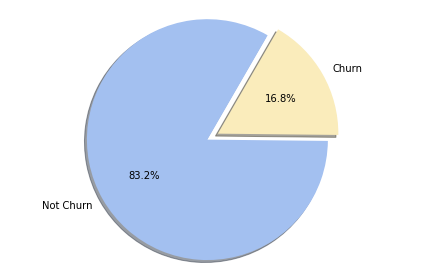

In [ ]:
# Pie chart
print('Proporsi Target:')

labels = ['Not Churn', 'Churn']

explode = (0, 0.1)  
fig1, ax = plt.subplots()

colors = ['#a3c0f0','#faecbb']

ax.pie(df['Churn'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60, colors=colors)

ax.axis('equal')  
plt.tight_layout()
plt.show()

* Walaupun proporsi target tidak seimbang antara persentase kelas 0 (tidak churn) sebesar 83.16% dengan persentase kelas 1 (churn) sebesar 16.84% atau dengan rasio 4.94 : 1, tapi ini tidak terlalu ekstrem dan akan coba ditoleransi terlebih dahulu. Bila hasil modeling buruk, model akan menggunakan *imbalanced treatment*. (Learning from Imbalanced Data Sets 1st ed. 2018 Edition)

<h4>Defining Categorical Features</h4>

Secara umum kolom bertipe data _object_ akan menjadi fitur kategorik. Kemudian,
untuk _feature_ `Complain`, `CityTier`, dan `SatisfactionScore`, walau tersimpan dalam bentuk integer juga akan masuk sebagai fitur kategorik. Secara esensi, _feature_ tersebut merupakan data kategorik dimana `Complain` merupakan data nominal - binary, lalu `CityTier` dan `SatisfactionScore` merupakan data ordinal

In [ ]:
# list berisi categorial features yang sudah bertipe integer
encoded_cat_features = ['Complain', 'CityTier', 'SatisfactionScore']

In [ ]:
# menggabungkan list berisi semua categorical features, termasuk yang bertipe integer
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') | (feature in encoded_cat_features))]
print(f'{len(cat_features)} Categorical Features:\n{cat_features}')

8 Categorical Features:
['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']


In [ ]:
# describe categorical features bertipe integer sebagai categorical
listEncoded = []
for col in encoded_cat_features :
    listEncoded.append([df[col].count(), df[col].nunique(), df[col].max(), df[col].value_counts().max()]);

dfEncoded = pd.DataFrame(columns=['count', 'unique', 'top', 'freq'],
                     data=listEncoded, index=encoded_cat_features)

kolom yang ingin diperhatikan ketika mendeskripsikan _feature_ kategorik adalah: ['count', 'unique', 'top', 'freq']. Sehingga _feature_ kategorik dengan tipe data integer akan dideskripsikan seperti _feature_ kategorik. Berikut ini merupakan tabel deskripsi *features* kategorik:

In [ ]:
# hasil penggabungan describe semua categorical features yang telah didefinisikan
df.describe(include=['O']).transpose().append(dfEncoded)

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986
Complain,5630,2,1,4026
CityTier,5630,3,3,3666
SatisfactionScore,5630,5,5,1698


Berdasarkan tabel deskripsi _feature_ kategorik di atas, dapat dilihat bahwa:
* tidak terdapat *missing values* pada *features* kategorik
* data dengan kardinalitas paling tinggi mengandung 7 *unique values*, dan yang paling rendah berbentuk biner (2 *unique values*)
* modus dari setiap *features* dapat dilihat pada kolom `top` dan jumlah kemunculan modus tersebut dapat dilihat pada kolom `freq`

<h3>Data cardinalities of categorical features</h3>

In [ ]:
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in PreferredLoginDevice:  3
Unique values:  ['Mobile Phone' 'Phone' 'Computer']

Total unique values in CityTier:  3
Unique values:  [3 1 2]

Total unique values in PreferredPaymentMode:  7
Unique values:  ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Total unique values in Gender:  2
Unique values:  ['Female' 'Male']

Total unique values in PreferedOrderCat:  6
Unique values:  ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Total unique values in SatisfactionScore:  5
Unique values:  [2 3 5 4 1]

Total unique values in MaritalStatus:  3
Unique values:  ['Single' 'Divorced' 'Married']

Total unique values in Complain:  2
Unique values:  [1 0]



Terdapat sejumlah redundansi *unique value* karena memiliki makna yang sama pada beberapa fitur:
* Pada *feature* `PreferredLoginDevice` terdapat redundansi antara *value* berisi `Mobile Phone` dan `Phone` karena keduanya merujuk pada perangkat *Mobile Phone*
* Hal serupa terjadi di *feature* `PreferredOrderCat`. Redundansi terjadi pada *value* berupa `Mobile` dan `Mobile Phone` yang juga merujuk pada *Mobile Phone*
* Pada *feature* `PreferredPaymentMode` terdapat redundansi antara *value* berisi `COD` dan `Cash on Delivery` karena keduanya merujuk pada metode pembayaran `Cash on Delivery` atau pembayaran tunai ketika barang tiba
* Pada kolom yang sama juga terjadi pada *value* `CC` dan `Credit Card`. Keduanya merujuk pada *Credit Card* / kartu kredit


<h3>Defining Numerical Features</h3>

Secara umum, kolom bertipe float dan integer akan menjadi fitur numerik, kecuali:
- `Churn`, karena merupakan target
- `Complain`, `CityTier`, `SatisfactionScore`, karena termasuk data kategori
- `CustomerID`, karena *unique ID* tidak akan digunakan dalam analisis

In [ ]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Churn', 'Complain', 'CityTier', 'SatisfactionScore', 'CustomerID']))]
  
print(f'{len(num_features)} Numerical Features:\n{num_features}')

10 Numerical Features:
['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


<h3>Central tendency, dispersion, and distribution points of numerical features</h3>

Berikut ini merupakan tabel statistik deskriptif dari seluruh *features* numerik:

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


Berdasarkan tabel statistik deskriptif di atas, dapat dilihat bahwa:
- Jumlah data `CustomerID` sama banyaknya dengan jumlah data keseluruhan (5630) dan semua data memiliki nilai yang *unique*, mulai dari 50001 s/d 55631 (5630)
- `Churn` dan `Complain` adalah data nominal *binary*
- Nilai maksimum di `Tenure` adalah 61, dengan demikian kemungkinan `Tenure` memang dalam bulan, bukan tahun
- Nilai maksimum di `HourSpendOnApp` hanya 5 jam, kemungkinan mewakili rata-rata jumlah jam penggunaan harian, bukan total keseluruhan waktu membuka aplikasi selama menjadi pelanggan
- Deskripsi nilai dari `CashbackAmount` akan menjadi patokan jumlah voucher yang kita berikan untuk pelanggan

## Initial Data Analysis and Data Cleaning

### Duplicated Rows

In [ ]:
# Jumlah baris terduplikasi
df.duplicated().sum()

0

Tidak terdapat baris yang terduplikasi

### Drop Unique Identifier

Pertama, CustomerID bisa di drop karena tidak berguna untuk analisis dan modeling. Untuk lebih yakin, kita cek sekali lagi apakah terdapat baris-baris dengan CustomerID yang sama (atau dengan kata lain mencari apakah ada pengguna yang disebut lebih dari sekali dalam dataset)

In [ ]:
print('Jumlah terjadinya duplikasi nilai CustomerID:')
print('->', df['CustomerID'].duplicated().any().sum())

Jumlah terjadinya duplikasi nilai CustomerID:
-> 0


Dikarenakan setiap baris data persis diwakili pengguna yang berbeda, maka CustomerID akan kita drop saja

In [ ]:
df.drop(columns = 'CustomerID', inplace=True)

### Re-Check Duplicated Rows

Cek ulang apakah ada duplikasi data setelah drop CustomerID

In [ ]:
duplicated_rows = df.duplicated().sum()

if duplicated_rows != 0:
  print('-> Terdapat', duplicated_rows, 'baris duplikat')
else:
  print('-> Tidak ada baris terduplikasi')

-> Terdapat 556 baris duplikat


Ternyata jika CustomerID di drop, maka muncul banyak baris duplikat. Hal ini terjadi karena terdapat baris data yg persis sama dari user id yg berbeda.

In [ ]:
df[df.duplicated()].head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1347,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
1359,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
1395,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
1456,1,0.0,Computer,1,13.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Single,2,1,24.0,1.0,1.0,6.0,161
1485,1,0.0,Phone,1,15.0,Credit Card,Female,2.0,3,Mobile Phone,5,Single,8,0,22.0,1.0,1.0,4.0,142


Cek beberapa kejadian duplikasi

In [ ]:
df.loc[(df['Churn'] == 1) & (df['Tenure'] == 11) & (df['PreferredLoginDevice'] == 'Mobile Phone') & (df['CityTier'] == 1) & (df['WarehouseToHome'] == 6)]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
11,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
1395,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154


In [ ]:
df.loc[(df['Churn'] == 1) & (df['Tenure'] == 0) & (df['PreferredLoginDevice'] == 'Computer') & (df['CityTier'] == 1) & (df['WarehouseToHome'] == 13) & (df['PreferredPaymentMode'] == 'Debit Card') & (df['Gender'] == 'Male')]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
18,1,0.0,Computer,1,13.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Single,2,1,24.0,1.0,1.0,6.0,161
1456,1,0.0,Computer,1,13.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Single,2,1,24.0,1.0,1.0,6.0,161


Duplikasi baris akan kita drop untuk menghindari overfit pada poin-poin data yang berulang persis juga menghindari information leakage:

In [ ]:
print('jumlah data sebelum di-drop:', len(df))
df.drop_duplicates(inplace=True)
print('jumlah data sesudah di-drop:', len(df))

jumlah data sebelum di-drop: 5630
jumlah data sesudah di-drop: 5074


### Redundant Values

Berikut beberapa redundansi makna yang ditemukan pada beberapa nilai di PreferredLogindevice, PreferredPaymentMode, dan PreferedOrderCat:

In [ ]:
print(f"PreferredLogindevice {df['PreferredLoginDevice'].unique()} ({df['PreferredLoginDevice'].nunique()})")
print(f"PreferredPaymentMode {df['PreferredPaymentMode'].unique()} ({df['PreferredPaymentMode'].nunique()})")
print(f"PreferedOrderCat {df['PreferedOrderCat'].unique()} ({df['PreferedOrderCat'].nunique()})")

PreferredLogindevice ['Mobile Phone' 'Phone' 'Computer'] (3)
PreferredPaymentMode ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'] (7)
PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] (6)


- Pada PreferedLogindevice, kita akan menyatukan nilai 'Mobile Phone' dan 'Phone' menjadi 'Mobile Phone' saja
- Pada PreferredPaymentMode, kita akan menyatukan nilai 'CC' dan 'Credit Card' menjadi 'Credit Card' saja. Juga nilai 'COD' dan 'Cash On Delivery' menjadi 'Cash on Delivery' saja
-Pada PreferedOrderCat, kita akan menyatukan nilai 'Mobile' dan 'Mobile' Phone menjadi 'Mobile Phone' saja

Merge synonymous Values

In [ ]:
df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace('CC', 'Credit Card', inplace=True)
df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery', inplace=True)
df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone', inplace=True)

Setelah menyamakan beberapa nilai yang redundan, unique value pada kolom-kolom tadi menjadi lebih sedikit:

In [ ]:
print(f"PreferredLogindevice {df['PreferredLoginDevice'].unique()} ({df['PreferredLoginDevice'].nunique()})")
print(f"PreferredPaymentMode {df['PreferredPaymentMode'].unique()} ({df['PreferredPaymentMode'].nunique()})")
print(f"PreferedOrderCat {df['PreferedOrderCat'].unique()} ({df['PreferedOrderCat'].nunique()})")

PreferredLogindevice ['Mobile Phone' 'Computer'] (2)
PreferredPaymentMode ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet'] (5)
PreferedOrderCat ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] (5)


### Outliers

Deteksi *outlier* dilakukan untuk menangkap anomali poin-poin data yang berjarak relatif jauh dari mayoritas observasi data lainnya. *Outlier* yang terdeteksi selanjutnya dapat dipertimbangkan untuk dihilangkan untuk mengurangi ketimpangan distribusi data.

In [ ]:
def find_anomalies(feature):

    data = df[feature]
    min = data.min()
    max = data.max()

    q1 = data.quantile(0.25)
    q2 = data.quantile(0.50)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    limit = iqr * 1.5
    lower_limit = q1 - limit
    upper_limit = q3 + limit

    lower_outliers = len(df[df[feature] < lower_limit])
    upper_outliers = len(df[df[feature] > upper_limit])

    result = {'feature': feature,
            'iqr': iqr,
            'min': min,
            'lower_limit': lower_limit,
            '25%': q1,
            '50%': q2,
            '75%': q3,
            'upper_limit': upper_limit,
            'max': max,
            'lower_outliers': lower_outliers,
            'upper_outliers': upper_outliers}

    return(result)

Berikut ini merupakan tabel *outlier*  pada *features* numerik:

In [ ]:
list_outlier = []

for i in num_features:
  outlier = find_anomalies(i)

  list_outlier.append([outlier['feature'], outlier['iqr'], outlier['min'], outlier['lower_limit'],
                          outlier['25%'], outlier['50%'], outlier['75%'], outlier['upper_limit'], outlier['max'],
                          outlier['lower_outliers'], outlier['upper_outliers']]);

df_outlier = pd.DataFrame(columns=['feature', 'iqr', 'min', 'lower_limit', '25%', '50%', '75%', 'upper_limit', 'max', 'lower_outliers', 'upper_outliers'],
                     data=list_outlier)
df_outlier

,feature,iqr,min,lower_limit,25%,50%,75%,upper_limit,max,lower_outliers,upper_outliers
0,Tenure,14.0,0.0,-19.0,2.0,9.0,16.0,37.0,61.0,0,4
1,WarehouseToHome,11.0,5.0,-7.5,9.0,13.0,20.0,36.5,127.0,0,2
2,HourSpendOnApp,1.0,0.0,0.5,2.0,3.0,3.0,4.5,5.0,3,3
3,NumberOfDeviceRegistered,1.0,1.0,1.5,3.0,4.0,4.0,5.5,6.0,217,146
4,NumberOfAddress,4.0,1.0,-4.0,2.0,3.0,6.0,12.0,22.0,0,4
5,OrderAmountHikeFromlastYear,5.0,11.0,5.5,13.0,15.0,18.0,25.5,26.0,0,29
6,CouponUsed,1.0,0.0,-0.5,1.0,1.0,2.0,3.5,16.0,0,610
7,OrderCount,2.0,1.0,-2.0,1.0,2.0,3.0,6.0,16.0,0,673
8,DaySinceLastOrder,5.0,0.0,-5.5,2.0,3.0,7.0,14.5,46.0,0,57
9,CashbackAmount,52.0,0.0,68.0,146.0,164.0,198.0,276.0,325.0,11,368


Untuk pertimbangan menghilangkan *outlier*, yang akan kita perhatikan adalah *outlier* dengan jumlah sedikit dan *outlier* yang ekstrem:

- *Outlier* yang berjumlah sedikit dapat dilihat dari jumlah *outlier* bawah (`lower_outliers`) dan *outlier* atas (`upper_outliers`). Pada *features* `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, dan `NumberOfAddress`, *outliers* atas atau bawahnya paling banyak hanya berjumlah empat, relatif kecil dibanding total data berjumlah lebih dari 5000 data. Jika kita menghilangkan data-data tersebut, maka jumlah data keseluruhan tidak akan berubah terlalu signifikan.
- *Outlier* yang ekstrem dapat dilihat dari jarak antara data terbesar (`max`) dibanding *outlier* atas (`upper_outliers`), dan jarak antara data terkecil (`min`) dibanding *outlier* bawah (`lower_outliers`). Dari semua `features` berjumlah sedikit yang telah ditentukan, hampir semua *outliers*nya termasuk ekstrem kecuali `HourSpendOnApp`. Pada `HourSpendOnApp` nilai *outlier* atas dan bawahnya hanya berjarak 0.5 (jam) dari batas atas dan bawahnya.

Berdasarkan dua poin di atas, maka karakteristik *outlier* yang memenuhi kriteria pertimbangan untuk dihapus terdapat pada *features* `Tenure`, `WarehouseToHome`, dan `NumberOfAddress`, karena jumlahnya sedikit dan jaraknya jauh dari observasi data lainnya. Selanjutnya kita akan teliti lebih lanjut untuk memutuskan apakan `features` tersebut memang akan dihapus.


<h4>Tenure</h4>

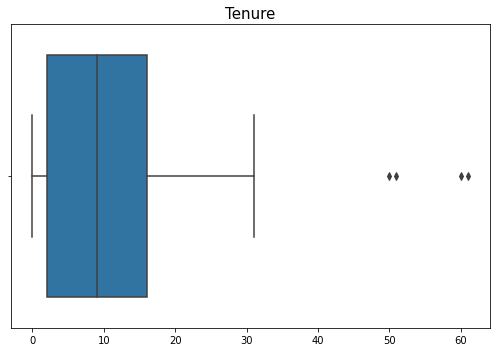

In [ ]:
feature = 'Tenure'

plt.figure(figsize=(7, 5))

ax = plt.subplot(1, 1, 1)
sns.boxplot(x=feature, data=df)
plt.title(feature, fontsize=15)    
plt.xlabel('')
plt.tight_layout();

In [ ]:
feature = 'Tenure'
limit_Tenure = df_outlier[df_outlier['feature'] == feature]['upper_limit'].item()

print(f'\nOutlier: {feature} > {limit_Tenure}\n')
pd.merge(df[df[feature] > limit_Tenure][feature], df[['Tenure', 'Churn', 'OrderCount', 'DaySinceLastOrder']].reset_index()).set_index(feature).drop_duplicates()


Outlier: Tenure > 37.0



,index,Churn,OrderCount,DaySinceLastOrder
Tenure,,,,
50.0,928,0,2.0,8.0
60.0,2719,0,1.0,0.0
51.0,3743,0,3.0,9.0
61.0,5534,0,2.0,1.0


Dari tabel di atas, terdapat 4 data *outlier* pada *feature* `Tenure`. Keempat data tersebut mempunyai lama Tenure 50 s/d 61 bulan, namun hanya melakukan order paling banyak hingga 3 kali. Berdasarkan jumlah pesanan tersebut yang terhitung  masih sedikit, dan pesanan terakhir yang belum lama, data mengindikasikan pengguna baru. Ada kemungkinan jumlah `Tenure` mengalami salah input, sehingga outlier ini dapat dihapus.

<h4>WarehouseToHome</h4>

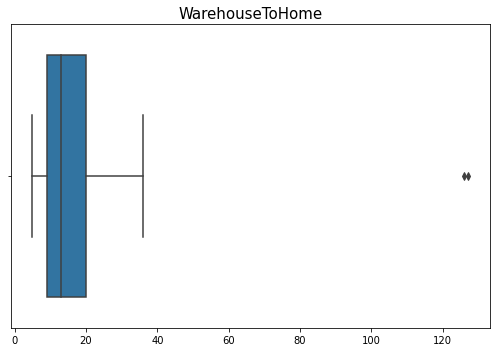

In [ ]:
feature = 'WarehouseToHome'

plt.figure(figsize=(7, 5))

ax = plt.subplot(1, 1, 1)
sns.boxplot(x=feature, data=df)
plt.title(feature, fontsize=15)    
plt.xlabel('')
plt.tight_layout();

In [ ]:
feature = 'WarehouseToHome'
limit_WarehouseToHome = df_outlier[df_outlier['feature'] == feature]['upper_limit'].item()

print(f'\nOutlier: {feature} > {limit_WarehouseToHome}\n')
pd.merge(df[df[feature] > limit_WarehouseToHome][feature], df[['WarehouseToHome', 'Churn', 'CityTier']].reset_index()).set_index(feature).drop_duplicates()


Outlier: WarehouseToHome > 36.5



,index,Churn,CityTier
WarehouseToHome,,,
126.0,1309,0,3
127.0,4124,0,3


Ketika filter data outlier pada feature 'WarehouseToHome', dapat dilihat bahwa terdapat 2 data outlier dengan value masing-masing 126 km, dan 127 km. Asumsi pada penelitian ini bahwa karakteristik user pada outlier tersebut antara lain:
1. Data outlier merupakan user yang tinggal di sub-urban atau rural sehingga jarak antara tempat tinggal dengan warehousenya jauh, dengan asumsi warehouse berada di pusat kota, namun ini belum bisa dibuktikan kebenarannya.
2. User salah mengisi value pada kolom 'WarehouseToHome', sehingga data ini dapat didrop.

Berdasarkan asumsi tersebut, pada kasus ini kami memilih untuk drop data utlier 'WarehouseToHome' karena hanya terdapat 2 data outlier, dan nilai outlier yang terlalu jauh bisa menyebabkan penilaian dan akurasi pada model. Selain itu, asumsi poin 1 belum bisa dibuktikan kebenarannya dengan data ini.

<h4>NumberOfAddress</h4>

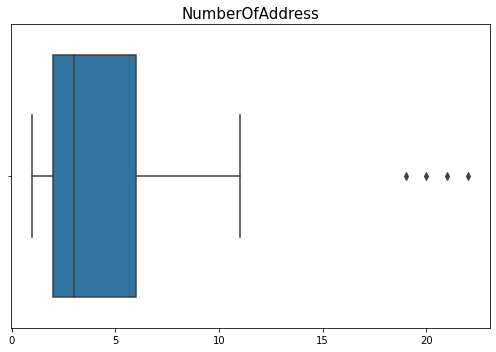

In [ ]:
feature = 'NumberOfAddress'

plt.figure(figsize=(7, 5))

ax = plt.subplot(1, 1, 1)
sns.boxplot(x=feature, data=df)
plt.title(feature, fontsize=15)    
plt.xlabel('')
plt.tight_layout();

In [ ]:
feature = 'NumberOfAddress'
limit_NumberOfAddress = df_outlier[df_outlier['feature'] == feature]['upper_limit'].item()

print(f'\nOutlier: {feature} > {limit_NumberOfAddress}\n')
pd.merge(df[df[feature] > limit_NumberOfAddress][feature], df[['NumberOfAddress', 'Churn', 'OrderCount']].reset_index()).set_index(feature).drop_duplicates()


Outlier: NumberOfAddress > 12.0



,index,Churn,OrderCount
NumberOfAddress,,,
19,260,1,1.0
21,691,0,1.0
20,3075,1,2.0
22,3506,0,2.0


Dari tabel di atas, terdapat 4 data yang merupakan outlier pada feature 'NumberOfAddress'. Keempat data tersebut memiliki jumlah alamat sebanyak 19-22, namun hanya melakukan order sekitar 1-2 kali saja. Hal ini dapat mengindikasikan kemungkinan terjadinya salah input jumlah alamat pada keempat data, sehingga outlier akan di drop dan analisis dibatasi hanya untuk data dengan 'NumberOfAddress' kurang dari atau sama dengan 12.

Drop Outliers

*Outlier* akan dihapus sesuai dengan skema penghapusan yang telah ditentukan

In [ ]:
# drop outliers
outliers = df[((df.Tenure > limit_Tenure) | (df.WarehouseToHome > limit_WarehouseToHome) | (df.NumberOfAddress > limit_NumberOfAddress))].index

df.drop(outliers, inplace=True)

### Missing Values

Missing Value ada pada kolom-kolom berikut:

In [ ]:
null_features = df.columns[df.isnull().any()].tolist()
print(f'{len(null_features)} Features containing missing value:\n{null_features}')

7 Features containing missing value:
['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


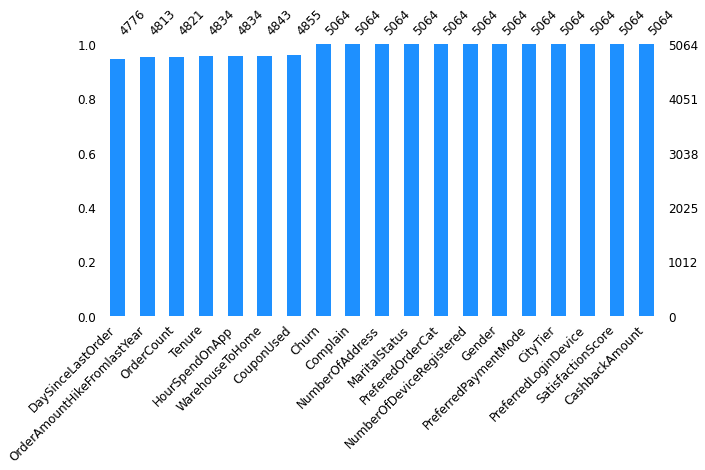

In [ ]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [ ]:
# non-null percentage for each column

(100 - df.isna().sum()/len(df)*100).sort_values().apply('{:,.2f} %'.format)

DaySinceLastOrder               94.31 %
OrderAmountHikeFromlastYear     95.04 %
OrderCount                      95.20 %
Tenure                          95.46 %
HourSpendOnApp                  95.46 %
WarehouseToHome                 95.64 %
CouponUsed                      95.87 %
Churn                          100.00 %
Complain                       100.00 %
NumberOfAddress                100.00 %
MaritalStatus                  100.00 %
PreferedOrderCat               100.00 %
NumberOfDeviceRegistered       100.00 %
Gender                         100.00 %
PreferredPaymentMode           100.00 %
CityTier                       100.00 %
PreferredLoginDevice           100.00 %
SatisfactionScore              100.00 %
CashbackAmount                 100.00 %
dtype: object

Kita lihat berdasarkan status churn-nya:

In [ ]:
df[df['Churn']==1].isna().sum()

Churn                           0
Tenure                         67
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                71
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                 50
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    14
CouponUsed                      5
OrderCount                     16
DaySinceLastOrder              53
CashbackAmount                  0
dtype: int64

Jika dilihat berdasarkan jumlah kolom yang memiliki missing value dari kelas 1 (Churn), maka ada baiknya missing value tidak di drop karena kasus yang imbalance butuh sebanyak mungkin kelas minoritas. jika missing value di drop, hasil prediksi kemungkinan semakin buruk karena kelas dengan data yang sedikit datanya akan semakin sedikit

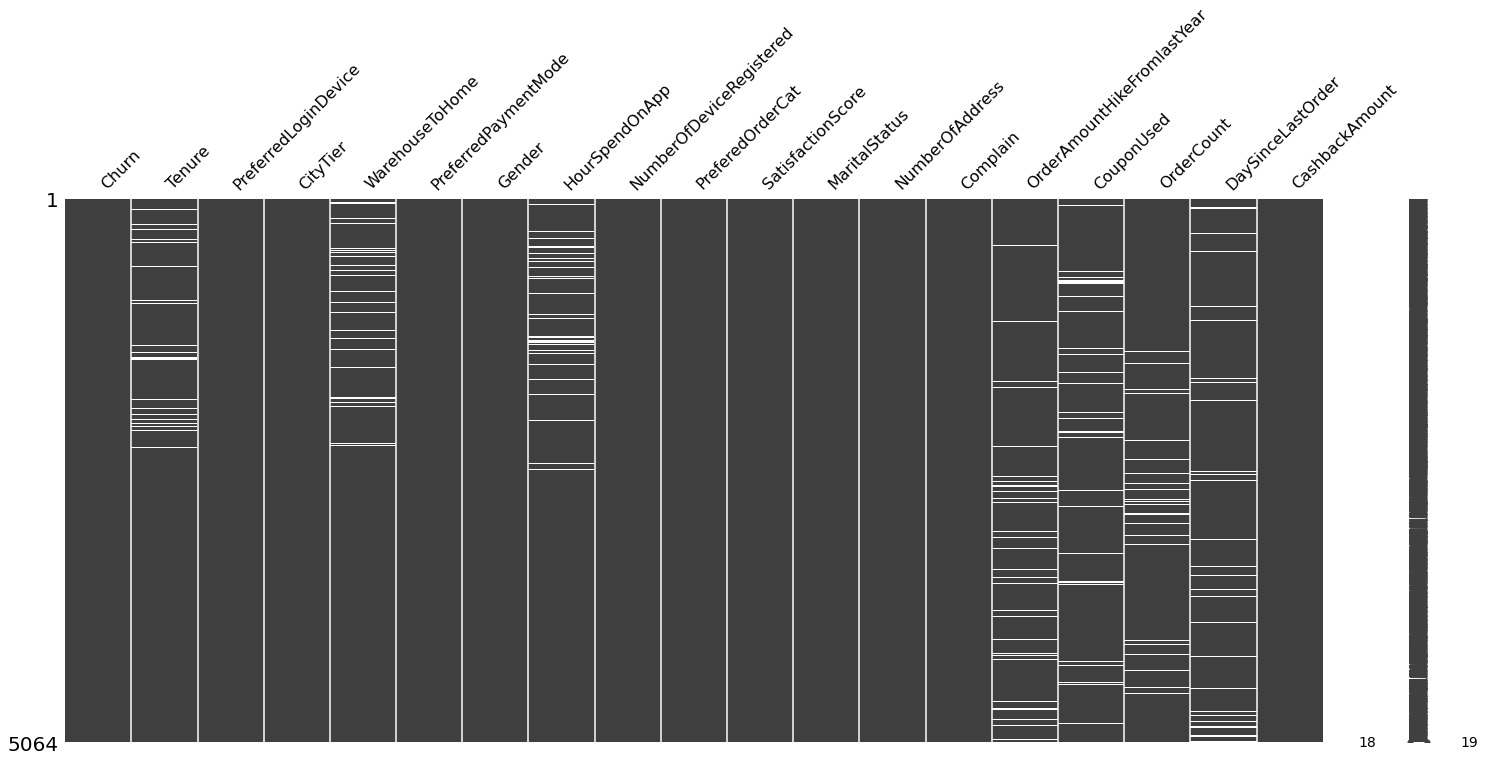

In [ ]:
missingno.matrix(df)

Tidak ada pola kemunculan missing value yang terjadi beriring pada kolom berbeda

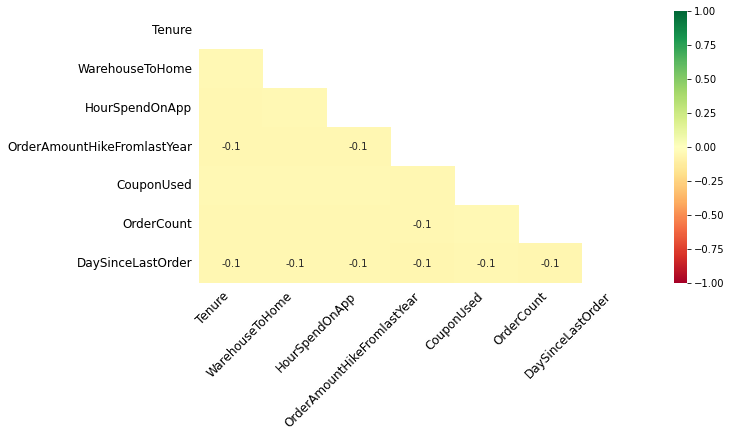

In [ ]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

Tidak terlihat korelasi berarti antar missing value, yang berarti setiap missing value pada setiap fitur terjadi pada baris yang berbeda satu sama lain

Imputing Scheme

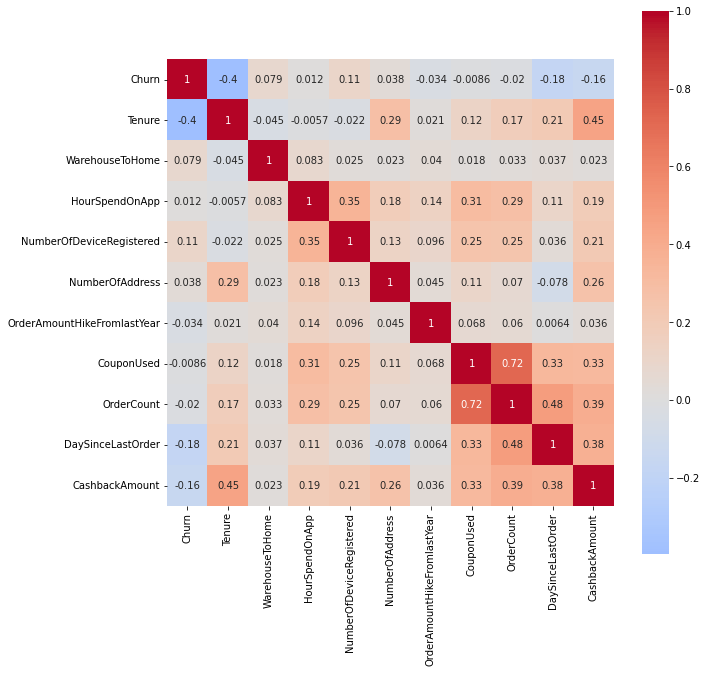

In [ ]:
df_corr = df[num_features].corr('spearman')

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, center=0, square=True, cmap="coolwarm")

- Terlihat korelasi berbanding lurus yang relatif kuat antara OrderCount dan CouponUsed, ini yang akan diisi dengan iterative imputer (asumsi 0.7 ke atas)
- di luar itu terdapat korelasi dengan tingkat menengah (asumsi 0.4 ke atas atau -0.4 ke bawah) tapi karena dirasa tidak sebegitu kuat maka tidak akan menjadi patokan untuk pengisian secara iterative

Fitur yang diisi menggunakan iterative imputer:

In [ ]:
iterative_features = ['OrderCount', 'CouponUsed']

Fitur yang diisi menggunakan simple imputer:

In [ ]:
simple_features = list(set(null_features) - set(iterative_features))
simple_features

['DaySinceLastOrder',
 'HourSpendOnApp',
 'Tenure',
 'OrderAmountHikeFromlastYear',
 'WarehouseToHome']

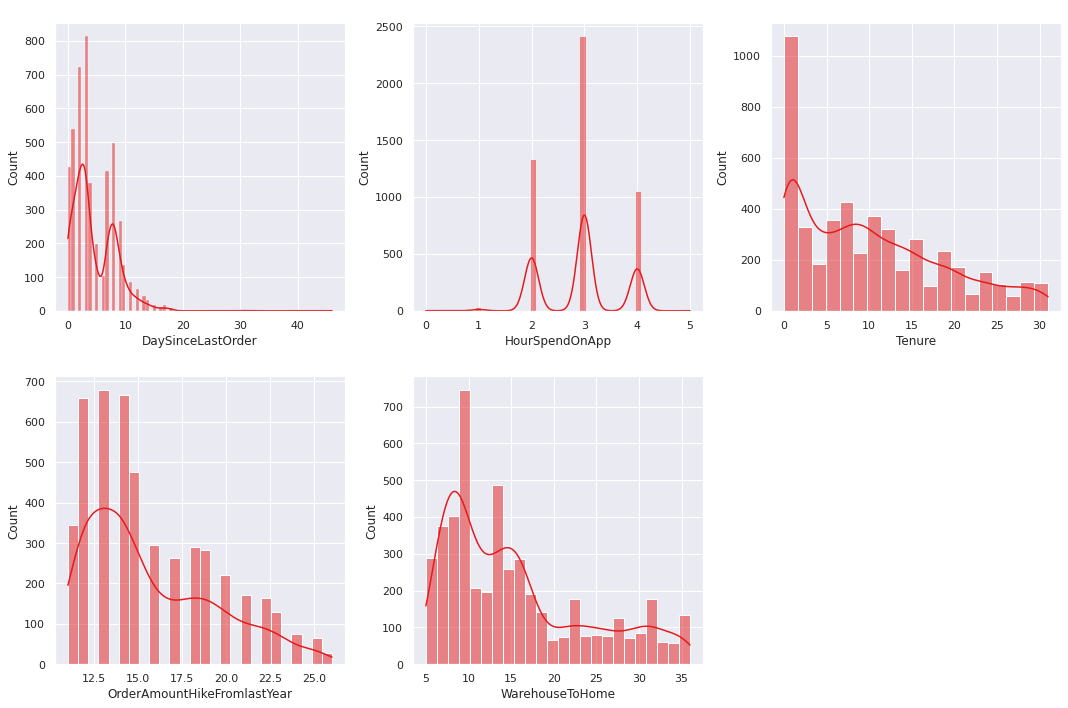

In [ ]:
features = simple_features
plt.figure(figsize=(15, 10))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(2, 3, plotnumber)
    sns.histplot(data=df, x=feature, kde=True)
    plt.xlabel(feature)
    plt.title(' ')    
    plotnumber += 1
    plt.tight_layout()

Dapat dilihat dari grafik tidak ada yang berdistribusi normal

Uji normalitas

In [ ]:
df_normal_test = df.dropna()

def normal_test(feature):

  result = shapiro(df_normal_test[feature])

  normal_stats = result[0]
  p_val = result[1]

  if p_val < 0.05:
      hypothesis = 'Not Normal (Reject H0)'
  else:
      hypothesis = 'Normal (Accept H0)'
  
  result = {'feature': feature,
          'normal_stats': normal_stats,
          'p_val': p_val,
          'hyphotesis': hypothesis}

  return(result)

In [ ]:
list_normal_test = []

for i in simple_features:
  norm_test = normal_test(i)

  list_normal_test.append([norm_test['feature'], norm_test['normal_stats'], norm_test['p_val'], norm_test['hyphotesis']]);

df_normal_test = pd.DataFrame(columns=['feature', 'normal_stats', 'p_val', 'hypothesis'],
                     data=list_normal_test)
df_normal_test

,feature,normal_stats,p_val,hypothesis
0,Tenure,0.906713,1.884186e-41,Not Normal (Reject H0)
1,WarehouseToHome,0.887448,2.382207e-44,Not Normal (Reject H0)
2,HourSpendOnApp,0.827627,0.000000e+00,Not Normal (Reject H0)
3,NumberOfDeviceRegistered,0.900003,1.629710e-42,Not Normal (Reject H0)
4,NumberOfAddress,0.870262,0.000000e+00,Not Normal (Reject H0)
5,OrderAmountHikeFromlastYear,0.915125,4.998586e-40,Not Normal (Reject H0)
6,CouponUsed,0.757870,0.000000e+00,Not Normal (Reject H0)
7,OrderCount,0.706444,0.000000e+00,Not Normal (Reject H0)
8,DaySinceLastOrder,0.890055,5.465064e-44,Not Normal (Reject H0)
9,CashbackAmount,0.863552,0.000000e+00,Not Normal (Reject H0)


Karena distribusi semua features yang perlu diisi missing valuenya tidak ada yang normal, maka semua akan diisi dengan nilai mediannya. Kemudian selanjutnya akan kita lihat rata-rata waktu yang dihabiskan oleh masing-masing pengguna computer dan mobile phone. jika berbeda signifikan maka pengisian missing value bagi tiap pengguna tersebut bisa dibedakan

In [ ]:
print('PreferredLoginDevice', df['PreferredLoginDevice'].unique())

PreferredLoginDevice ['Mobile Phone' 'Computer']


In [ ]:
df.groupby("PreferredLoginDevice").mean()['HourSpendOnApp']

PreferredLoginDevice
Computer        2.904693
Mobile Phone    2.938533
Name: HourSpendOnApp, dtype: float64

Ternyata rata-rata penghabisan waktu di aplikasi baik pemakai computer maupun mobile phone tidak berbeda jauh (~2.9 jam). Tapi untuk pembuktian lebih lanjut, maka akan dilakukan normal test terhadap data `HourSpendOnApp` pada dua *features* tersebut

In [ ]:
df_ = df.dropna()

result = ttest_ind(
              df_[df_['PreferredLoginDevice'] == 'Computer']['HourSpendOnApp'],
              df_[df_['PreferredLoginDevice'] == 'Mobile Phone']['HourSpendOnApp'],
              equal_var = True
            )

print(result,'\n')

if result[1] < 0.05:
      print('-> Rata-rata HourSpendOnApp pengguna Computer tidak sama dengan pengguna Mobile Phone (Reject H0)')
else:
      print('-> Rata-rata HourSpendOnApp pengguna Computer sama dengan pengguna Mobile Phone (Accept H0)')

Ttest_indResult(statistic=-0.422239824952042, pvalue=0.6728767522833506) 

-> Rata-rata HourSpendOnApp pengguna Computer sama dengan pengguna Mobile Phone (Accept H0)


Ternyata berdasarkan hasil normal test, rata-rata `HourSpendOnApp` pengguna computer dan mobile phone sama. Jadi pengisian missing values untuk `HourSpendOnApp` berdarsarkan `PreferredLoginDevice` nya tidak perlu dibedakan.

Semua missing values yang tersisa akan diisi menggunakan nilai mediannya masing-masing, yaitu pada kolom `HourSpendOnApp`, `DaySinceLastOrder`, `OrderAmountHikeFromlastYear`, `Tenure`, dan `WarehouseToHome`

In [ ]:
median_features = simple_features
median_features

['HourSpendOnApp',
 'DaySinceLastOrder',
 'OrderAmountHikeFromlastYear',
 'Tenure',
 'WarehouseToHome']

Missing value akan diisi sesuai skema pengisian missing value yang telah ditentukan, yaitu menggunakan iterative imputer dan simple imputer dengan nilai median

In [ ]:
median_imputer = SimpleImputer(strategy='median')
iterative_imputer = IterativeImputer()

In [ ]:
def imputer(df):

    for i in median_features:
        df[i] = median_imputer.fit_transform(df[i].values.reshape(-1, 1))[:,0]

    for i in iterative_features:
        df[i] = iterative_imputer.fit_transform(df[i].values.reshape(-1, 1))[:,0]

    return(df)

In [ ]:
# untuk kepentingan visualisasi, akan disimpan dataframe sebelum impute
df_num = df.copy(deep=True)

# isi missing value dengan imputer
df = imputer(df)
df.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

setelah di impute, sudah tidak ada missing values

## Test Statistic

Uji statistik pada studi kasus ini dilakukan untuk mengetahui hubungan antar variabel, khususnya hubungan antara feature dengan target (churn). Pada penelitian ini akan mempraktikkan beberapa uji hipotesis diantaranya _Two Sample Independent T-Test_ untuk data numerik ,dan _Chi Square_ untuk data kategorikal.



### Two-sample T-test

Uji statistik _Two Sample Independent T-Test_ pada studi kasus ini untuk mengetahui ada atau tidaknya perbedaan antara rata-rata *feature* yang memiliki tipe data numerikal dengan rata-rata *target*, antara lain:  
`Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `NumberOfDeviceRegistered`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`,	`OrderCount`, `DaySinceLastOrder`, `CashbackAmount` dengan target, yaitu `Churn`.

**Hypothesis**:
<br>
**Ho**: Rata-rata _Feature_ yang tidak *churn* sama dengan rata-rata *feature* yang churn.
<br>
**Ha**: Rata-rata _Feature_ yang tidak *churn* berbeda dengan rata-rata *feature* yang *churn*.

In [ ]:
# Two sample independent t-test
def t_test_num(feature):

  result = list(ttest_ind(
                df[df['Churn'] == 1][feature],
                df[df['Churn'] == 0][feature],
                equal_var = True
              ))

  t_stats = result[0]
  p_val = result[1]

  if result[1] < 0.05:
      hypothesis = 'Not Equal (Reject H0)'
  else:
      hypothesis = 'Equal (Accept H0)'
  
  result = {'feature': feature,
          't_stats': t_stats,
          'p_val': p_val,
          'hyphotesis': hypothesis}

  return(result)


In [ ]:
list_t_test = []

for i in num_features:
  t_test = t_test_num(i)

  list_t_test.append([t_test['feature'], t_test['t_stats'], t_test['p_val'], t_test['hyphotesis']]);

df_ttest = pd.DataFrame(columns=['feature', 't_stats', 'p_val', 'hypothesis'],
                     data=list_t_test)
df_ttest

,feature,t_stats,p_val,hypothesis
0,Tenure,-25.154585,1.144335e-131,Not Equal (Reject H0)
1,WarehouseToHome,4.988401,6.291730e-07,Not Equal (Reject H0)
2,HourSpendOnApp,1.015035,3.101378e-01,Equal (Accept H0)
3,NumberOfDeviceRegistered,8.363530,7.786531e-17,Not Equal (Reject H0)
4,NumberOfAddress,3.470546,5.237371e-04,Not Equal (Reject H0)
5,OrderAmountHikeFromlastYear,-1.511510,1.307211e-01,Equal (Accept H0)
6,CouponUsed,-0.192087,8.476819e-01,Equal (Accept H0)
7,OrderCount,-1.542998,1.228937e-01,Equal (Accept H0)
8,DaySinceLastOrder,-10.587844,6.323712e-26,Not Equal (Reject H0)
9,CashbackAmount,-10.246951,2.111219e-24,Not Equal (Reject H0)


**Conclusion**:
P-Value lebih rendah dari tingkat signifikansi (0,05), artinya kita memiliki cukup bukti untuk menolak Hipotesis Nol. Oleh karena itu, berdasarkan tabel hasil analisis statistik diatas, dapat dilihat bahwa _feature_ numerikal yang memiiliki rata-rata berbeda antara yang churn dan tidak churn, antara lain antara lain `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `NumberOfAddress`, `DaySinceLastOrder`, dan `CashbackAmount` karena menolak Hipotesis Nol.

### Chi-squared Test

Uji statistik _Chi-Square_ pada studi kasus ini untuk mengetahui hubungan antara _feature_ dengan tipe data kategorikal, yaitu `PreferredLoginDevice`, `CityTier`, `PreferredPaymentMode`, `Gender`, `PreferedOrderCat`, `SatisfactionScore`, `MaritalStatus`, `Complain` dengan target, yaitu `Churn`.



**Hypothesis**:
<br>
**Ho**: _Feature_ tidak mempengaruhi target (churn)
<br>
**Ha**: _Feature_ mempengaruhi target (churn)

In [ ]:
def chi_square_cat(feature):
  
  df_feature = df[feature]

  not_churn = []
  churn = []

  for i in df_feature.unique():
      not_churn.append(len(df[(df_feature == i) & (df['Churn'] == 0)]))
      churn.append(len(df[(df_feature == i) & (df['Churn'] == 1)]))

  data = [not_churn, churn]

  chi_stats, p_val, dof, expected = chi2_contingency(data)
  alpha = 0.05

  if p_val <= alpha:
      hypothesis = 'Dependent (Reject H0)'
  else:
      hypothesis = 'Independent (Accept H0)'

  result = {'feature': feature,
          'data': data,
          'chi_stats': chi_stats,
          'p_val': p_val,
          'hyphotesis': hypothesis}

  return(result)  

In [ ]:
list_chi_square = []

for i in cat_features:
  chi_square = chi_square_cat(i)

  list_chi_square.append([chi_square['feature'], chi_square['chi_stats'], chi_square['p_val'], chi_square['hyphotesis']]);

df_chi_square = pd.DataFrame(columns=['feature', 'chi_stats', 'p_val', 'hypothesis'],
                     data=list_chi_square)
df_chi_square

,feature,chi_stats,p_val,hypothesis
0,PreferredLoginDevice,12.385324,4.327215e-04,Dependent (Reject H0)
1,CityTier,49.952380,1.422259e-11,Dependent (Reject H0)
2,PreferredPaymentMode,49.755702,4.060830e-10,Dependent (Reject H0)
3,Gender,3.973949,4.620927e-02,Dependent (Reject H0)
4,PreferedOrderCat,226.426179,7.760609e-48,Dependent (Reject H0)
5,SatisfactionScore,57.479912,9.811513e-12,Dependent (Reject H0)
6,MaritalStatus,169.697011,1.415019e-37,Dependent (Reject H0)
7,Complain,309.645877,2.608364e-69,Dependent (Reject H0)


**Conclusion**:
P-Value lebih rendah dari tingkat signifikansi (0,05), artinya kita memiliki cukup bukti untuk menolak Hipotesis Nol. Oleh karena itu, berdasarkan tabel hasil analisis statistik diatas, dapat dilihat bahwa seluruh _feature_ dengan tipe data kategorikal memiliki hubungan dengan target.

## Exploratory Data Analysis

### EDA: Categorical Features

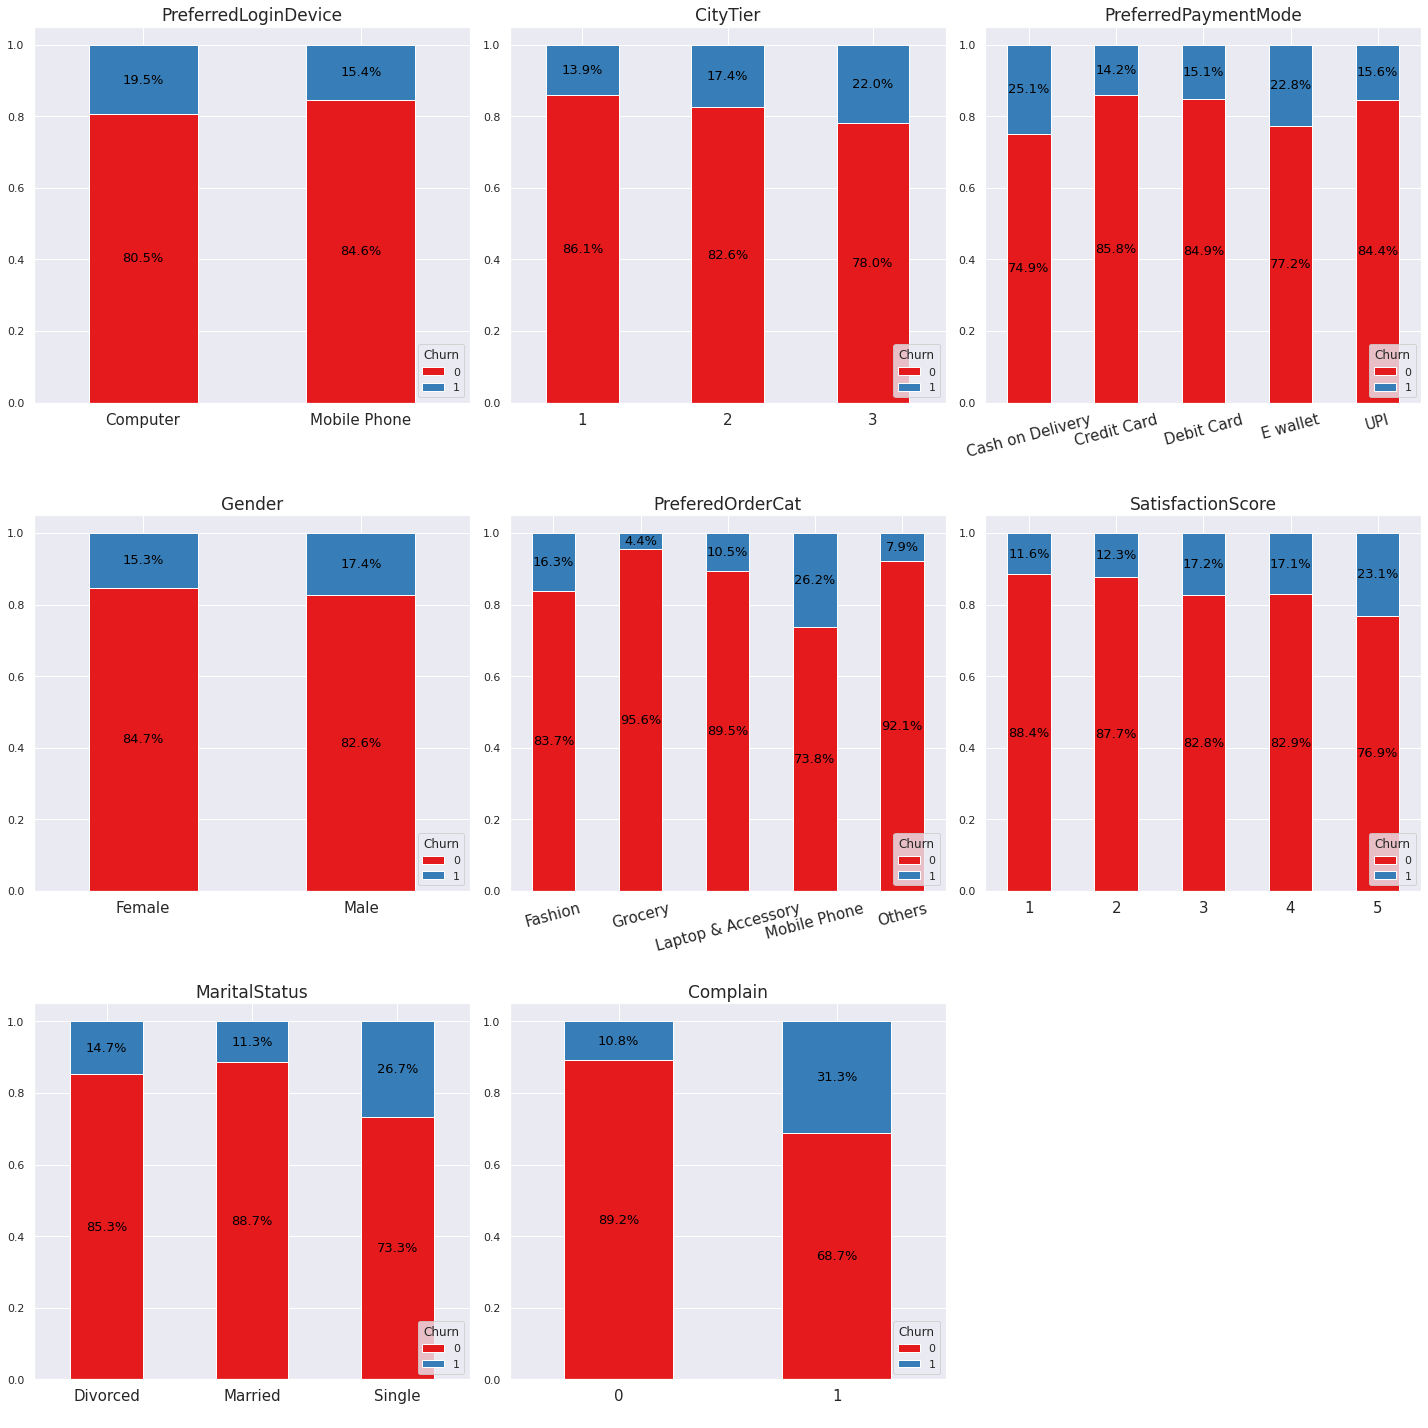

In [ ]:
features = cat_features
sns.set(palette='Set1')
fig = plt.figure(figsize=(20,20))
count = 0

for feature in features:
    count +=1
    ax= plt.subplot(3,3,count)    

    df_crosstab = pd.crosstab(index=df[feature], columns=df['Churn'])
    df_crosstab_percent = pd.crosstab(index=df[feature], columns=df['Churn'], normalize='index')

    df_crosstab_percent.plot(kind='bar', stacked=True, ax=ax)

    plt.legend(loc='lower right', title='Churn')
    plt.xlabel(' ')
    plt.title(feature, fontsize=17)

    unique_values = (df[feature].astype(str).unique())
    rotation  = 0

    for i in unique_values:
      if len(i) > 15:
        rotation = 15
        break

    plt.xticks(rotation=rotation, fontsize=15)

    for n, x in enumerate([*df_crosstab.index.values]):
      for (proportion, y_loc) in zip(df_crosstab_percent.loc[x], df_crosstab_percent.loc[x].cumsum()):
                  
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', color="black",
                 fontsize=13, va = 'center', ha = 'center')
    
    fig.tight_layout()

plt.show()


Berdasarkan barplot diatas, dapat disimpulkan beberapa hal:
1.	Pelanggan yang *feature* `PreferredLoginDevice` nya `Computer` lebih cenderung churn daripada pelanggan yang menggunakan `Mobile Phone`.
2.	Pelanggan yang *feature* `CityTier` nya 3 lebih cenderung churn daripada pelanggan yang tinggal di `CityTier` yang lain.
3.	Pelanggan yang *feature* `PreferredPaymentMode` nya `Cash on Delivery` lebih cenderung churn daripada yang menggunakan metode pembayaran lain.
4.	Pelanggan yang *feature* `Gender` nya `Male` lebih cenderung churn daripada pelanggan `Female`.
5.	Pelanggan yang *feature* `PreferredOrderCat` nya `Mobile Phone` lebih cenderung churn dibandingkan *feature* `PreferredOrderCat` yang lain.
6.	Pelanggan yang *feature* `Satisfaction Score` nya 5 lebih cenderung churn daripada pelanggan yang lain.
7.	Pelanggan yang *feature* `MaritalStatus` nya `Single` lebih cenderung churn disbanding pelanggan lain.
8.	Pelanggan yang *feature* `Complain` nya 1 (pernah complain) lebih cenderung churn daripada pelanggan yang tidak pernah complain.


### EDA: Numerical Features

In [ ]:
# binning numerical features

bin_points = [[0,2,12], [5,10,18], [0,3,4], [1,4,5], [1,2,4,6], [11,12,16], [0,3], [1,3], [1,4,7], [0,125,170]]

bin_labels = [['0-1 month', '2-11 months', '≥ 12 months'],
              ['5-9 km', '10-17 km', '≥ 18 km'],
              ['0-2 hours', '3 hours', '≥ 4 hours'],
              ['1-3', '4', '≥ 5'],
              ['1', '2-3', '4-5','≥ 6'],
              ['≤ 11%', '12-15%', '≥ 16%'],
              ['0-2', '≥ 3'],
              ['1-2', '≥ 3'],
              ['1-3 days', '4-6 days', '≥ 7 days'],
              ['0-124 INR', '125-169 INR', '≥ 170 INR']]

bin_list = []
cat_list = []

bins = bin_points
for i in range(len(bins)):
  bins[i].pop(0)
  bins[i] = [-np.inf] + (list(np.array(bins[i]) - 1) + [np.inf])

for i in range(len(num_features)):
  bin_list.append({
    'feature': num_features[i],
    'bins': bins[i],
    'labels': bin_labels[i]
    })
  
df_bin = pd.DataFrame(bin_list)

for i in range(len(df_bin)):
  cat_list.append(pd.cut(df[df_bin['feature'][i]], bins=df_bin['bins'][i], labels=df_bin['labels'][i]))

df_bin['cat_array'] = cat_list

df_bin

,feature,bins,labels,cat_array
0,Tenure,"[-inf, 1, 11, inf]","[0-1 month, 2-11 months, ≥ 12 months]",0 2-11 months 1 2-11 months 2 ...
1,WarehouseToHome,"[-inf, 9, 17, inf]","[5-9 km, 10-17 km, ≥ 18 km]",0 5-9 km 1 5-9 km 2 ≥ 1...
2,HourSpendOnApp,"[-inf, 2, 3, inf]","[0-2 hours, 3 hours, ≥ 4 hours]",0 3 hours 1 3 hours 2 0-...
3,NumberOfDeviceRegistered,"[-inf, 3, 4, inf]","[1-3, 4, ≥ 5]",0 1-3 1 4 2 4 3 ...
4,NumberOfAddress,"[-inf, 1, 3, 5, inf]","[1, 2-3, 4-5, ≥ 6]",0 ≥ 6 1 ≥ 6 2 ≥ 6 3 ≥ ...
5,OrderAmountHikeFromlastYear,"[-inf, 11, 15, inf]","[≤ 11%, 12-15%, ≥ 16%]",0 ≤ 11% 1 12-15% 2 12-15% 3...
6,CouponUsed,"[-inf, 2, inf]","[0-2, ≥ 3]",0 0-2 1 0-2 2 0-2 3 0-...
7,OrderCount,"[-inf, 2, inf]","[1-2, ≥ 3]",0 1-2 1 1-2 2 1-2 3 1-...
8,DaySinceLastOrder,"[-inf, 3, 6, inf]","[1-3 days, 4-6 days, ≥ 7 days]",0 4-6 days 1 1-3 days 2 1-3 ...
9,CashbackAmount,"[-inf, 124, 169, inf]","[0-124 INR, 125-169 INR, ≥ 170 INR]",0 125-169 INR 1 0-124 INR 2 ...


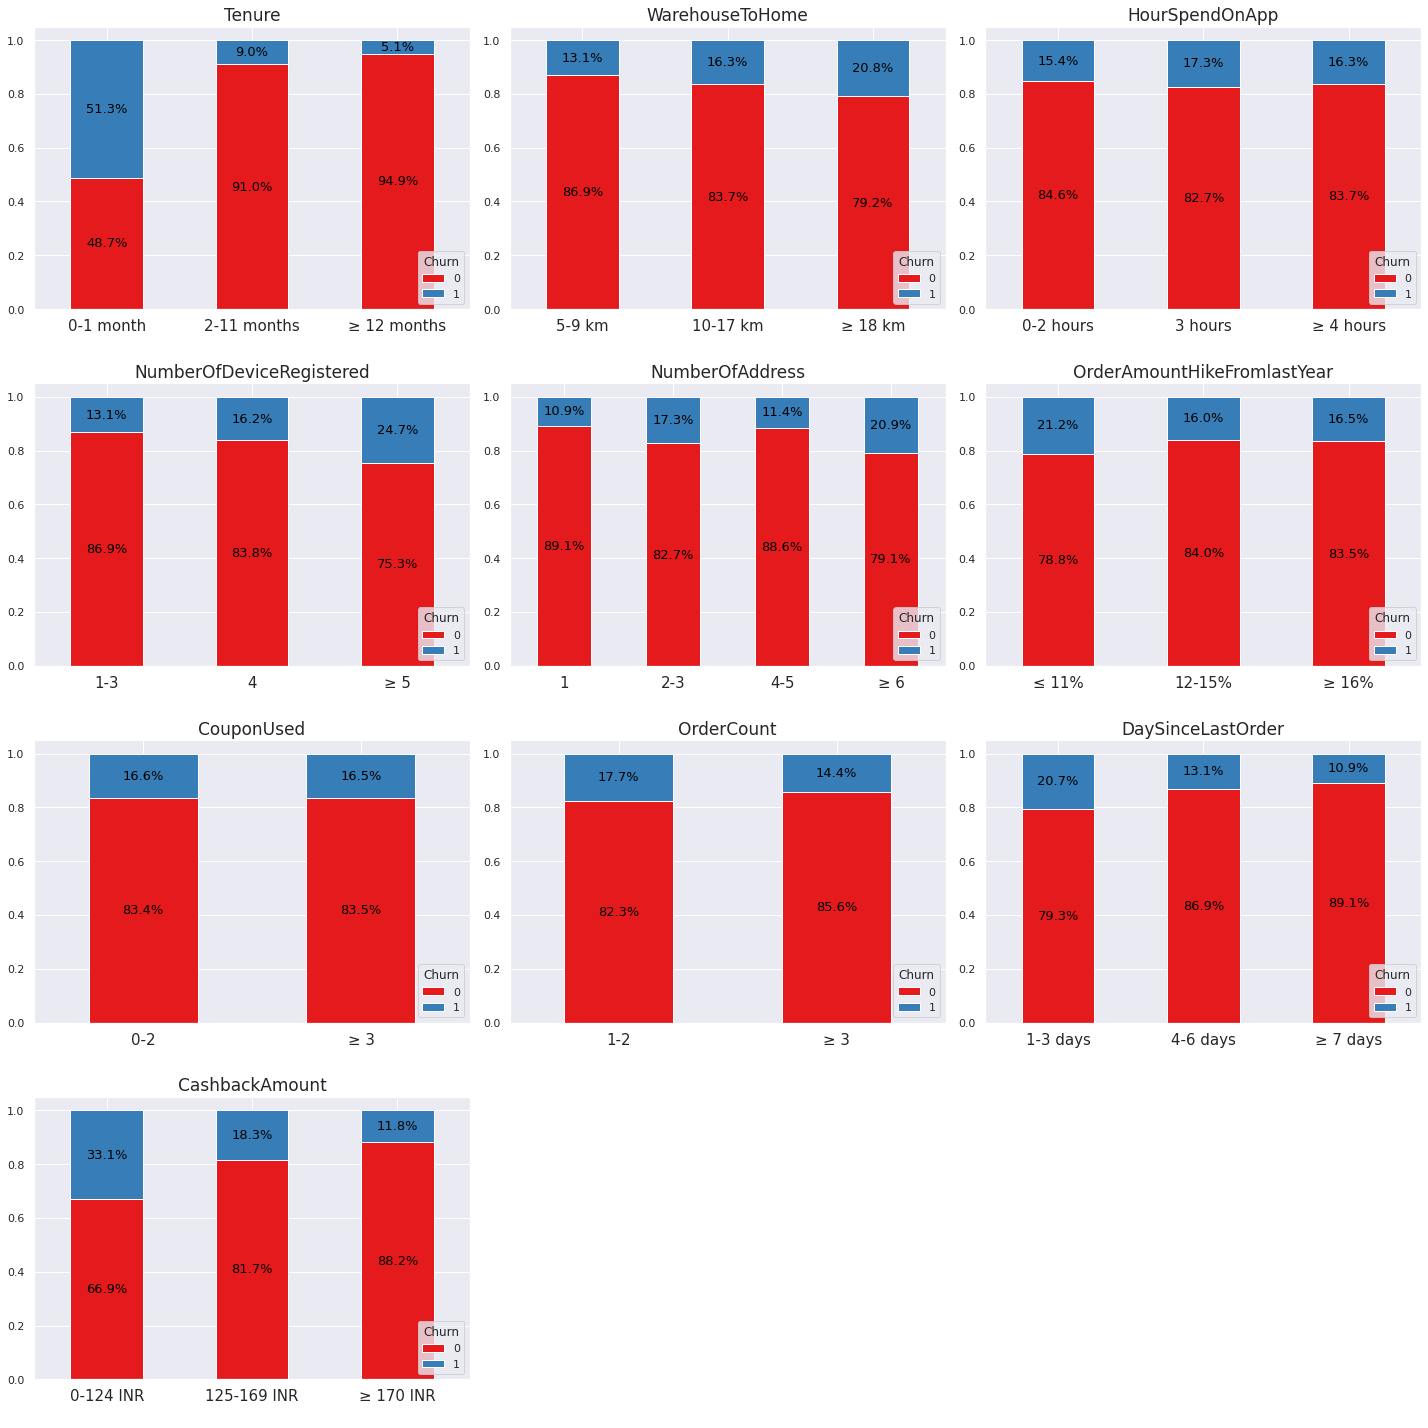

In [ ]:
sns.set(palette='Set1')
fig = plt.figure(figsize=(20,20))
count = 0

for i in range(len(df_bin)):
    count +=1
    ax= plt.subplot(4,3,count)    

    feature = df_bin['feature'][i]
    cat_array = df_bin['cat_array'][i]

    df_crosstab = pd.crosstab(index=cat_array, columns=df['Churn'])
    df_crosstab_percent = pd.crosstab(index=cat_array, columns=df['Churn'], normalize='index')

    df_crosstab_percent.plot(kind='bar', stacked=True, ax=ax)

    plt.legend(loc='lower right', title='Churn')
    plt.xlabel(' ')
    plt.title(feature, fontsize=17)
    plt.xticks(rotation = 0, fontsize=15)

    for n, x in enumerate([*df_crosstab.index.values]):
      for (proportion, y_loc) in zip(df_crosstab_percent.loc[x], df_crosstab_percent.loc[x].cumsum()):
                  
          plt.text(x=n, y=(y_loc - proportion) + (proportion / 2),
                  s=f'{np.round(proportion * 100, 1)}%', color="black",
                  fontsize=13, va = 'center', ha = 'center')
    
    fig.tight_layout()

plt.show()


Berdasarkan barplot di atas, kita dapat menyimpulkan beberapa hal:

1. Berdasarkan *feature* `Tenure`, pelanggan cenderung *churn* saat baru menggunakan aplikasi selama 0 hingga 1 bulan pertama.
1. Berdasarkan *feature* `WarehouseToHome`, pelanggan cenderung *churn* ketika jarak dari rumah ke gudang dekat lebih dari 8 km.
1. Berdasarkan *feature* `HourSpendOnApp`, pelanggan yang cenderung *churn* adalah pelanggan yang kesehariannya menggunakan aplikasi selama 3 jam.
1. Berdasarkan *feature* `NumberOfDeviceRegistered`, pelanggan cenderung *churn* ketika jumlah perangkat yang terdaftar lebih dari 5.
1. Berdasarkan *feature* `NumberOfAddress`, pelanggan dengan jumlah alamat lebihh dari 6 lebih cenderung *churn* dibandingkan yang lain. 
1. Berdasarkan *feature* `OrderAmountHikeFromlastYear`, pelanggan yang persentase kenaikan ordernya *churn* dapat dikatakan cukup merata pada seluruh data persentase kenaikan pesanan dan cenderung lebih banyak pada nilai 12% hingga 14%.
1. Berdasarkan *feature* `CouponUsed`, pelanggan *churn* cenderung baru menggunakan sedikit kupon atau belum pernah menggunakan sama sekali.
1. Berdasarkan *feature* `OrderCount`, banyak pelanggan *churn* yang baru melakukan pesanan hanya 1 atau 2 kali (kemungkinan pengguna baru jika dihubungkan dengan *feature* `Tenure`).
1. Berdasarkan *feature* `DaySinceLastOrder`, banyak pelanggan yang belum lama memesan barang tapi ternyata *churn*.
1. Berdasarkan *feature* `CashbackAmount`, banyak pelanggan yang telah menerima total sekitar 125 hingga 175 INR dalam bentuk *cashback* sebelum *churn*.

## Data Splitting

In [ ]:
X = df.drop(columns = 'Churn')
y = df['Churn']

Semua kolom akan menjadi features (X) kecuali `Churn`, karena `Churn` akan menjadi target (y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 193340
    )

Data dibagi menjadi 80% data training dan 20% data testing

## Data Preprocessing

<h3>Encoding Scheme</h3>

Pada bagian *encoding* ini, kami mendefinisikan fitur-fitur non-numerik, yaitu *feature* dengan tipe data selain *integer*, dan *float* yang perlu dilakukan _encoding_ menjadi numerik agar dapat digunakan pada tahap *modeling*, kemudian melihat *unique value* pada fitur yang akan dilakukan _encoding_ untuk menentukan skema _encoding_ yang tepat:

In [ ]:
encode_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O'))]
df[encode_features].nunique()

PreferredLoginDevice    2
PreferredPaymentMode    5
Gender                  2
PreferedOrderCat        5
MaritalStatus           3
dtype: int64

Penentuan *encoder* pada studi kasus ini dibagi menjadi dua teknik *encoder*. Jika *features* kategorik memiliki *unique value* dibawah 5, maka akan menggunakan *one hot encoder*, sedangkan untuk *features* kategorik yang memiliki *unique value* lebih dari atau sama dengan 5, maka akan menggunakan *binary encoder*.

In [ ]:
one_hot_features = df[encode_features].nunique() < 5
one_hot_features = one_hot_features[one_hot_features].index.tolist()

binary_features = list(set(encode_features) - set(one_hot_features))

<h3>Defining The Column Transformer</h3>

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), one_hot_features),
    ('binary', ce.BinaryEncoder(), binary_features),
],  remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['PreferredLoginDevice', 'Gender',
                                  'MaritalStatus']),
                                ('binary', BinaryEncoder(),
                                 ['PreferedOrderCat', 'PreferredPaymentMode'])])

In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,1.0,27.0,3.0,3.0,1.0,8.0,0.0,20.0,1.0,1.000000,2.0,123.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,31.0,2.0,4.0,4.0,5.0,1.0,20.0,1.0,2.000000,2.0,123.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,28.0,3.0,6.0,3.0,3.0,1.0,4.0,0.0,14.0,0.0,1.000000,0.0,202.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,22.0,1.0,12.0,2.0,4.0,3.0,3.0,1.0,19.0,2.0,3.096453,12.0,240.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0,14.0,3.0,4.0,1.0,3.0,1.0,12.0,2.0,2.000000,10.0,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,26.0,1.0,7.0,2.0,4.0,3.0,5.0,1.0,20.0,1.0,1.000000,3.0,230.0
4047,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12.0,1.0,7.0,4.0,4.0,5.0,3.0,0.0,14.0,5.0,6.000000,12.0,261.0
4048,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,23.0,1.0,10.0,3.0,5.0,5.0,6.0,0.0,26.0,1.0,2.000000,3.0,173.0
4049,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,12.0,3.0,4.0,1.0,5.0,0.0,15.0,1.0,2.000000,1.0,146.0


Proses transformasi menghasilkan total 23 *features* (0 s/d 22) yang akan digunakan untuk modeling

## Model Benchmarking

Kita akan melatih beberapa benchmark model, antara lain logistic regression, k-nearest neightbors, decision tree, random forest, adaboost, gradient boost, XG boost, dan light gradient boosting machine. Pelatihan menggunakan cross-validation agar tidak terjadi data *leakage*. Model hasil pelatihan terbaik selanjutnya akan diuji performanya pada test set.

In [ ]:
# Defining Benchmark Models

logreg = LogisticRegression(random_state=2022)

knn = KNeighborsClassifier()

tree = DecisionTreeClassifier(random_state=2022)

rf = RandomForestClassifier(random_state=2022)

ada = AdaBoostClassifier(tree, random_state=2022)

gbc = GradientBoostingClassifier(random_state=2022)

xgbc = XGBClassifier(random_state=2022, verbosity=0)

lgbm = LGBMClassifier(random_state=2022)

In [ ]:
# Cross-validation on benchmark models

models = [logreg,knn,tree,rf,ada,gbc,xgbc,lgbm]
skfold = StratifiedKFold(n_splits=10)
score=[]
mean_values=[]
std_values=[]

for i in models:
   
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])

    model_cv = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=skfold, 
        scoring='f1',
        error_score='raise'
        )
    
    print(model_cv)

    score.append(model_cv)
    mean_values.append(model_cv.mean())
    std_values.append(model_cv.std())

[0.65454545 0.56410256 0.52991453 0.58715596 0.51851852 0.61946903
 0.44230769 0.68253968 0.52941176 0.5862069 ]
[0.5840708  0.44247788 0.41441441 0.45098039 0.41509434 0.50909091
 0.46551724 0.5046729  0.48598131 0.46017699]
[0.84892086 0.85294118 0.82517483 0.82170543 0.80597015 0.78195489
 0.81203008 0.82608696 0.8358209  0.79710145]
[0.8852459  0.87692308 0.81666667 0.88888889 0.85       0.85
 0.89256198 0.921875   0.88333333 0.83870968]
[0.87407407 0.84671533 0.79432624 0.81203008 0.79710145 0.8358209
 0.7761194  0.83211679 0.83333333 0.80597015]
[0.74782609 0.67213115 0.63414634 0.71428571 0.70588235 0.68965517
 0.66055046 0.80645161 0.77876106 0.66115702]
[0.7079646  0.6557377  0.63157895 0.7027027  0.66666667 0.67241379
 0.66666667 0.77777778 0.73394495 0.62711864]
[0.90769231 0.82170543 0.859375   0.90625    0.86821705 0.85714286
 0.87804878 0.90769231 0.87394958 0.86567164]


In [ ]:
# Show cross-validation result

train_score = []

df_cv = pd.DataFrame({
    'model':['logreg','knn','tree','rf','ada','gbc','xgbc','lgbm'],
    'mean':mean_values,
    'std':std_values
}).sort_values(by='mean', ascending=False).reset_index(drop=True)

chosen_model = df_cv.head(2)['model'].values
train_score = df_cv.head(2)['mean'].values

df_cv

,model,mean,std
0,lgbm,0.874574,0.025805
1,rf,0.870420,0.029388
2,tree,0.820771,0.021130
3,ada,0.820761,0.027525
4,gbc,0.707085,0.052768
5,xgbc,0.684257,0.044418
6,logreg,0.571417,0.067113
7,knn,0.473248,0.048200


Terlihat bahwa model lgbm (Light Gradient Boosted Machine) dan model rf (Random Forest) memiliki nilai f1-score terbaik dibandingkan dengan model yang lainnya. Maka selanjutnya 2 model tersebut akan diuji performanya pada test set.

## Testing Model on Test Set

Pengujian dilakukan pada 20% data

In [ ]:
# Test on best models
test_score = []

models={
    'rf': RandomForestClassifier(random_state=2022),
    'lgbm': LGBMClassifier(random_state=2022)
}

score=[]

for i in models:

    model = Pipeline([
        ('transformer', transformer),
        ('model', models[i])
    ])

    # fitting
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_test)

    # roc_auc score
    score.append([f1_score(y_test, y_pred)])

score_before_tuning = pd.DataFrame(score, columns=['F1 score'], index = models.keys())

for i in chosen_model:
  test_score.append(score_before_tuning.loc[i].values[0])

In [ ]:
df_before_tuning = pd.DataFrame({
    'train_score': train_score,
    'test_score': test_score
}, index=chosen_model)

df_before_tuning

,train_score,test_score
lgbm,0.874574,0.865031
rf,0.870420,0.867925


Setelah model diuji terhadap data test set, terlihat bahwa secara keseluruhan f1-score untuk hasil *train score* lgbm (Light Gradient Boosted Machine) sedikit lebih besar dari hasil *train score* rf (Random Forest), tetapi *test score* rf lebih besar dibanding *test score* lgbm. Sehingga, kedua model tersebut akan dilakukan *hyperparameter tuning* untuk meningkatkan f1-score.

## Hyperparameter Tuning

In [ ]:
tuned_model = []
tuned_train_score = []
tuned_test_score = []

### LGBM

In [ ]:
lgbm_estimator = Pipeline([('transformer', transformer),
                           ('model', lgbm)])

lgbm_hyperparam_space=[{
    'model__max_bin': [25, 50, 100, 125, 175, 255, 250],
    'model__num_leaves':[15, 30, 45, 60, 75, 100, 125],
    'model__min_data_in_leaf': [15, 30, 45, 60, 75, 100, 125],
    'model__num_iterations':[10, 25, 50, 75, 100, 150, 200],
    'model__learning_rate': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.15, 0.2]
}]

lgbm_random_search = RandomizedSearchCV(
    lgbm_estimator,
    lgbm_hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs = -1,
    n_iter = 100,
    random_state = 2022
)

# fit
lgbm_random_search.fit(X_train, y_train)
tuned_model.append('tuned lgbm')
tuned_train_score.append(lgbm_random_search.best_score_)
print('Model: LGBM')
print('Best Hyperparameters:',lgbm_random_search.best_params_)
print('\nTrain Score:',lgbm_random_search.best_score_)

Model: LGBM
Best Hyperparameters: {'model__num_leaves': 45, 'model__num_iterations': 200, 'model__min_data_in_leaf': 15, 'model__max_bin': 125, 'model__learning_rate': 0.2}

Train Score: 0.9106573931165048


Hasil *train score* LGBM setelah *tunning* dengan metric F1-score adalah 0.91, meningkat dari *train score* sebelumnya yaitu 0.87

In [ ]:
lgbm_tuning = lgbm_random_search.best_estimator_
lgbm_tuning.fit(X_train, y_train)
y_pred_lgbm_tuning = lgbm_tuning.predict(X_test)

# f1 score
f1_lgbm_tuning = f1_score(y_test, y_pred_lgbm_tuning)
tuned_test_score.append(f1_lgbm_tuning)

print('Test Score:',f1_lgbm_tuning)

Test Score: 0.9014925373134329


Hasil *Test score* LGBM setelah *tunning* dengan metric F1-score meningkat dari 0.86 menjadi 0.90.

### Random Forest

In [ ]:
rf_estimator = Pipeline([('transformer', transformer),
                         ('model', rf)])

rf_hyperparam_space = {
    'model__n_estimators': [5,20,50,100],
    'model__criterion' : ['gini','entropy'],
    'model__max_features': ['auto', 'sqrt'],
    'model__max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
    'model__min_samples_split': [2, 6, 10],
    'model__min_samples_leaf': [1, 3, 4],
    'model__bootstrap': [True, False]
    }

rf_random_search = RandomizedSearchCV(
    rf_estimator,
    rf_hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs = -1,
    n_iter = 100,
    random_state = 2022
)

# fit
rf_random_search.fit(X_train, y_train)
tuned_model.append('tuned rf')
tuned_train_score.append(rf_random_search.best_score_)
print('Model: Random Forest')
print('Best Hyperparameters:',rf_random_search.best_params_)
print('\nTrain Score:',rf_random_search.best_score_)

Model: Random Forest
Best Hyperparameters: {'model__n_estimators': 50, 'model__min_samples_split': 6, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 110, 'model__criterion': 'entropy', 'model__bootstrap': False}

Train Score: 0.8864967982833587


Hasil *train score* Random Forest setelah *tunning* dengan metric F1-score adalah 0.89, meningkat dari *train score* sebelumnya yaitu 0.86

In [ ]:
rf_tuning = rf_random_search.best_estimator_
rf_tuning.fit(X_train, y_train)
y_pred_rf_tuning = rf_tuning.predict(X_test)

# f1 score
f1_rf_tuning = f1_score(y_test, y_pred_rf_tuning)
tuned_test_score.append(f1_rf_tuning)

print('Test Score:',f1_rf_tuning)

Test Score: 0.8753799392097263


Hasil *Test score* Random Forest setelah *tunning* dengan metric F1-score meningkat dari 0.87 menjadi 0.89.

### Best Model: LGBM

In [ ]:
df_after_tuning = pd.DataFrame({
    'train_score': tuned_train_score,
    'test_score': tuned_test_score
}, index=tuned_model)

df_after_tuning

,train_score,test_score
tuned lgbm,0.910657,0.901493
tuned rf,0.886497,0.875380


Dilihat dari F1-score, pengujian hasil *test score* terbaik yaitu sebesar `0.901493` pada model LGBM. Maka model LGBM setelah *tunning* akan menjadi model terbaik yang akan digunakan.

<h4>Saving Model</h4>

In [ ]:
best_model = lgbm_random_search.best_estimator_
best_model.fit(X_train, y_train)

filename = 'Churn Prediction Model.sav'
pickle.dump(best_model, open(filename,'wb'))

## Best Model Result

### Confusion Matrix

Text(27.5, 0.5, 'Actual')

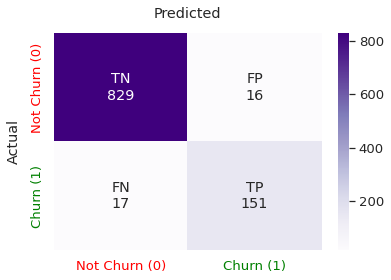

In [ ]:
cm_test_lgbm = confusion_matrix(y_test, y_pred_lgbm_tuning)

top_left = f'TN\n{cm_test_lgbm[0,0]}'
top_right = f'FP\n{cm_test_lgbm[0,1]}'
bottom_left = f'FN\n{cm_test_lgbm[1,0]}'
bottom_right = f'TP\n{cm_test_lgbm[1,1]}'

cm_labels = np.array([[top_left,top_right], [bottom_left,bottom_right]])

sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lgbm, annot = cm_labels, fmt = '', cmap='Purples')

plt.gca().get_xticklabels()[0].set_color('red')
plt.gca().get_xticklabels()[1].set_color('green')
plt.xticks(np.arange(0.5, 2, step=1), ['Not Churn (0)', 'Churn (1)'])

plt.gca().get_yticklabels()[0].set_color('red')
plt.gca().get_yticklabels()[1].set_color('green')
plt.yticks(np.arange(0.5, 2, step=1), ['Not Churn (0)', 'Churn (1)'])

plt.title('Predicted', pad=15)
plt.ylabel('Actual', labelpad=10)

TP: Terdapat 151 pelanggan churn yang benar diprediksi sebagai churn<br>
TN: Terdapat 829 pelanggan tidak churn yang benar diprediksi tidak churn<br>
FP: Terdapat 16 kesalahan prediksi pelanggan tidak churn malah diprediksi sebagai churn<br>
FN: Terdapat 17 kesalahan prediksi pelanggan yang churn malah diprediksi tidak churn<br>

### Feature Importance

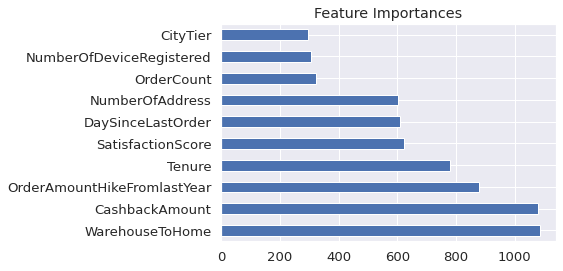

In [ ]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat bahwa untuk melakukan klasifikasi menggunakan model lgbm, *features* yang digunakan tidak memiliki perbedaan nilai *feature importance* yang terlalu besar. *Feature* `CashbackAmout` adalah yang paling penting, kemudian diikuti dengan `WarehouseToHome`, `Tenure`, dan seterusnya.

## Conclusion and Recommendation

In [ ]:
print('Classification Report Tuned LGBM : \n', classification_report(y_test, y_pred_lgbm_tuning))

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       845
           1       0.90      0.90      0.90       168

    accuracy                           0.97      1013
   macro avg       0.94      0.94      0.94      1013
weighted avg       0.97      0.97      0.97      1013



<p align='justify'>
&emsp;&emsp;Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan bahwa bila seandainya nanti kita menggunakan model kita untuk membantu menawarkan promo, maka model kita dapat mengurangi 99.3% pelanggan yang tidak churn agar tidak perlu ditawarkan promo, dan model kita dapat mendapatkan 93% pelanggan yang memang churn dari seluruh pelanggan yang churn. (semua ini berdasarkan recallnya)</p>

<p align='justify'>
&emsp;&emsp;Model kita ini memiliki ketepatan prediksi pelanggan yang churn sebesar 96% (precisionnya), jadi setiap model kita memprediksi bahwa seseorang akan churn, maka kemungkinan tebakannya benar itu sebesar 96% kurang lebih. Maka masih akan ada pelanggan yang sebenarnya tidak churn tetapi diprediksi sebagai pelanggan yang churn sekitar 0.7% dari keseluruhan pelanggan yang tidak churn (berdasarkan recall).</p>

<p align='justify'>
&emsp;&emsp;Bila seandainya biaya untuk promo dalam bentuk voucher per pelanggan itu ₹177 (Rupee) dan kerugian kehilangan pelanggan sebesar ₹1000 (asumsi jumlah promo didapat dengan ....., dan andaikan jumlah pelanggan selama ini sebanyak 1013 orang (dimana 845 orang tidak churn, dan 168 orang lagi telah churn), maka hitungannya kurang lebih akan seperti ini:</p>

Tanpa Model (semua kandidat kita check dan tawarkan) :
- Total Pelanggan = 1013 (Tidak churn = 845; Churn = 168)
- Total Biaya =>  1013 x 177 = 179.301
- Total pelanggan yang churn, diberikan promo => 168 orang (karena semua kita tawarkan)
- Total pelanggan yang churn, tidak diberikan promo  => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 845 x 177 INR = 149.565 (karena 4225 orang tidak churn, tetap diberikan voucher)
- Jumlah penghematan => 0 USD

Dengan Model (hanya investasi kepada pelanggan yang diprediksi churn) :
- Jumlah pelanggan diprediksi churn dari semua yang benar-benar churn => 168(churn) x 93%(recall 1) = 156
- Jumlah pelanggan diprediksi churn, tetapi tidak churn  => 845(tidak churn) x 0.7%(1 - recall 0) = 6
- Total Biaya => biaya investasi perusahaan kepada pelanggan churn = (156 x 177 INR) + (6 x 177 INR) = 27.612 INR + 1.062 INR = 28.674 INR
- Total pelanggan churn, diberikan promo => 156 orang (karena recall 1/yg tertarik itu 92%)
- Total pelanggan churn, tidak diberikan promo => 12 orang (karena recall 1/yg tertarik itu 92%)
- Biaya yang terbuang => 6 x 177 INR = 1.062 INR (berdasarkan recall 0/yg tidak tertarik (6 pelanggan tidak churn, tetap diberikan promo))
- Jumlah pelanggan yang diprediksi tidak churn, benar-benar tidak churn => 845 x 99.3%(recall 0) = 839
- Jumlah penghematan => 839 x 177 INR = 148.503 INR (yang dihitung hanya yang memang tidak churn)
- Total kerugian apabila pelanggan churn karena tidak diberikan promo  => 12 x 1000 INR = 12.000 INR

<p align='justify'>
&emsp;&emsp;Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak pelanggan yang kemudian memang churn.</p>
<br>
<hr>

**Recommendation**<br>

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Memperkuat data-data sebagai dasar justifikasi asumsi yang telah dibuat, misalnya harga barang untuk setiap jenis produk, kemudian untuk `OrderCount` akan lebih baik lagi jika dilengkapi informasi barang yang dibeli atau biaya yang dikeluarkan dalam satu kali transaksi. Kemudian, `SatisfactionScore` perlu diberi keterangan nilai yang paling bagus dan paling buruk karena jika dilihat dari EDA terkait `SatisfactionScore`, semakin tinggi nilai `SatisfactionScore` malah semakin tinggi pula `Churn`.
- fitur yang berhubungan dengan harga akan membantu untuk analisis, misal rata-rata belanja pelanggan
- Mencoba *algorithm Machine Learning* yang lain dan juga mencoba *hyperparameter tunning* kembali untuk mendapatkan score terbaik.
- Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.
- Untuk mengetahui arah hubungan feature terhadap target dapat divisualisasikan menggunakan *library Shap*.

## Appendix

### Recommendation Alternative: Coupon Value Based on Predicted Churn Probability

Alternatif rekomendasi lain adalah dengan membedakan jumlah voucher atau kupon yang diberikan kepada pelanggan. Pertama kita hitung probabilitas tiap pelanggan yang diprediksi *churn* oleh model. Lalu kita akan kategorikan pelanggan berdasarkan besar probabilitasnya untuk *churn*.

In [ ]:
# Churn Probability
result = best_model.predict(X_test)

result_proba = best_model.predict_proba(X_test)[:,1]

df_result = pd.DataFrame({
    'Prediction':result,
    'Probability':result_proba
})

df_result = df_result.join(X_test.reset_index()).drop(columns = 'index')

Berdasarkan probabilitas *churn* dari model yang telah dilatih, maka data pelanggan yang diprediksi *churn* dibagi kedalam 3 kelas prioritas untuk kepentingan membedakan nilai voucher yang akan diberikan. Pembagian kelasnya adalah sebagai berikut:
- 50% ≤ p ≤ 70% : Churn Low
- 70% ≤ p ≤ 90% : Churn Med
- 90% ≤ p ≤ 100% : Churn High

In [ ]:
# Binning class based on probability
bins = [0.5, 0.7, 0.9, 1]
labels = ['Churn Low', 'Churn Med', 'Churn High']

In [ ]:
df_result['Priority'] = pd.cut(df_result['Probability'], bins=bins, labels=labels)

In [ ]:
df_result[df_result['Prediction'] == 1].value_counts('Priority')

Priority
Churn High    154
Churn Med       7
Churn Low       6
dtype: int64

Skema jumlah kupon yang diberikan untuk setiap kelas adalah sebagai berikut:
- Churn Low = 180 INR
- Churn Med = 185 INR
- Churn High = 190 INR

In [ ]:
low_mean = df_result[df_result['Priority'] == 'Churn Low'].mean()['CashbackAmount']
med_mean = df_result[df_result['Priority'] == 'Churn Med'].mean()['CashbackAmount']
high_mean = df_result[df_result['Priority'] == 'Churn High'].mean()['CashbackAmount']
non_mean = df_result[df_result['Priority'].isna()].mean()['CashbackAmount']

In [ ]:
df_cashback_mean = pd.DataFrame({
    'Priority': ['Churn Low', 'Churn Med', 'Churn High', 'Not Churn'],
    'Cashback Given': [low_mean, med_mean, high_mean, non_mean]
})

In [ ]:
df_cashback_mean

,Priority,Cashback Given
0,Churn Low,162.000000
1,Churn Med,145.428571
2,Churn High,162.324675
3,Not Churn,180.070922


In [ ]:
df[df['Churn'] == 0].mean()['CashbackAmount']

180.75952662721895

In [ ]:
df[df['Churn'] == 1].mean()['CashbackAmount']

161.83790226460073

### Predict New Data

Pada projek ini juga akan mencoba memasukan data baru kedalam model untuk memprediksi pelanggan yang *churn* atau tidak *churn* setelah mendapatkan model dan parameter terbaik menggunakan LGBM. Jumlah data pelanggan yang akan diuji coba untuk memprediksi pelanggan akan *churn* atau tidak *churn* pada projek ini menggunakan data acak yang akan otomatis menggunakan *Numpy* dimana data baru yang akan diuji coba berjumlah 10 data pelanggan baru sebagai berikut:

In [ ]:
# Randomizing 10 New Data
n = 10

Tenure = np.random.choice(range(0,5), n)
WarehouseToHome = np.random.choice(range(5,37), n)
HourSpendOnApp = np.random.choice(range(0,6), n)
NumberOfDeviceRegistered = np.random.choice(range(1,7), n)
SatisfactionScore = np.random.choice(range(1,6), n)
NumberOfAddress = np.random.choice(range(1,12), n)
OrderAmountHikeFromlastYear = np.random.choice(range(11,27), n)
CouponUsed = np.random.choice(range(0,17), n)
OrderCount = np.random.choice(range(1,17), n)
DaySinceLastOrder = np.random.choice(range(0,47), n)
CashbackAmount = np.random.choice(range(125,201), n)

Complain = np.random.choice(range(0,2), n)
CityTier = np.random.choice(range(1,4), n)
SatisfactionScore = np.random.choice(range(1,6), n)

PreferredLoginDevice = np.random.choice(['Mobile Phone', 'Computer'], n)
PreferredPaymentMode = np.random.choice([ 'Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'], n)
Gender  = np.random.choice(['Female', 'Male'], n)
PreferedOrderCat = np.random.choice(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion', 'Grocery'], n)
MaritalStatus = np.random.choice(['Single', 'Divorced', 'Married'], n)

In [ ]:
df_new = pd.DataFrame({
    'Tenure': Tenure,
    'PreferredLoginDevice': PreferredLoginDevice,
    'CityTier': CityTier,
    'WarehouseToHome': WarehouseToHome,
    'PreferredPaymentMode': PreferredPaymentMode,
    'Gender': Gender,
    'HourSpendOnApp': HourSpendOnApp,
    'NumberOfDeviceRegistered': NumberOfDeviceRegistered,
    'PreferedOrderCat': PreferedOrderCat,
    'SatisfactionScore': SatisfactionScore,
    'MaritalStatus': MaritalStatus,
    'NumberOfAddress': NumberOfAddress,
    'Complain': Complain,
    'OrderAmountHikeFromlastYear': OrderAmountHikeFromlastYear,
    'CouponUsed': CouponUsed,
    'OrderCount': OrderCount,
    'DaySinceLastOrder': DaySinceLastOrder,
    'CashbackAmount': CashbackAmount
})

df_new

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,Computer,1,30,UPI,Male,5,3,Mobile Phone,5,Divorced,10,0,13,11,11,20,172
1,4,Mobile Phone,2,18,E wallet,Female,5,2,Fashion,4,Divorced,6,0,13,0,9,1,181
2,0,Mobile Phone,3,33,E wallet,Male,0,6,Fashion,2,Single,2,0,13,6,8,19,141
3,0,Computer,3,5,Cash on Delivery,Female,1,1,Fashion,2,Divorced,4,1,13,15,5,37,167
4,2,Mobile Phone,1,26,E wallet,Female,4,1,Fashion,1,Married,2,1,17,10,4,24,165
5,3,Computer,1,36,E wallet,Female,2,6,Mobile Phone,5,Married,10,1,23,0,14,37,200
6,2,Computer,3,15,UPI,Female,1,4,Fashion,5,Divorced,6,0,20,15,9,42,125
7,2,Mobile Phone,1,11,E wallet,Female,5,5,Mobile Phone,4,Married,4,0,12,15,2,22,190
8,3,Computer,2,19,Cash on Delivery,Male,2,3,Laptop & Accessory,3,Married,1,0,11,6,11,33,137
9,4,Computer,1,35,E wallet,Female,4,4,Laptop & Accessory,4,Married,1,1,24,12,6,8,159


In [ ]:
# load model
filename = 'Churn Prediction Model.sav'
churn_model = pickle.load(open(filename,'rb'))

In [ ]:
# fitting
churn_model.fit(X_train, y_train)

# predict
ChurnPrediction = churn_model.predict(df_new)
ChurnProbability = np.round_(churn_model.predict_proba(df_new)[:,1], 6)

In [ ]:
df_new.insert(0, 'ChurnPrediction', ChurnPrediction)
df_new.insert(1, 'ChurnProbability', ChurnProbability)

In [ ]:
df_new

,ChurnPrediction,ChurnProbability,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,0.994675,1,Computer,1,30,UPI,Male,5,3,Mobile Phone,5,Divorced,10,0,13,11,11,20,172
1,0,0.004207,4,Mobile Phone,2,18,E wallet,Female,5,2,Fashion,4,Divorced,6,0,13,0,9,1,181
2,1,0.999934,0,Mobile Phone,3,33,E wallet,Male,0,6,Fashion,2,Single,2,0,13,6,8,19,141
3,1,0.977758,0,Computer,3,5,Cash on Delivery,Female,1,1,Fashion,2,Divorced,4,1,13,15,5,37,167
4,0,0.000000,2,Mobile Phone,1,26,E wallet,Female,4,1,Fashion,1,Married,2,1,17,10,4,24,165
5,1,0.937074,3,Computer,1,36,E wallet,Female,2,6,Mobile Phone,5,Married,10,1,23,0,14,37,200
6,0,0.000069,2,Computer,3,15,UPI,Female,1,4,Fashion,5,Divorced,6,0,20,15,9,42,125
7,0,0.000014,2,Mobile Phone,1,11,E wallet,Female,5,5,Mobile Phone,4,Married,4,0,12,15,2,22,190
8,0,0.000000,3,Computer,2,19,Cash on Delivery,Male,2,3,Laptop & Accessory,3,Married,1,0,11,6,11,33,137
9,0,0.106675,4,Computer,1,35,E wallet,Female,4,4,Laptop & Accessory,4,Married,1,1,24,12,6,8,159


Seperti yang telah dilakukan analisis sebelumnya pada *feature importance* ditemukan bahwa *feature* `Cashbackamount`, `WarehouseToHome`, dan `Tenure` merupakan 3 *features* yang paling berpengaruh terhadap pelanggan `Churn`. Jika kami mengiterasi data untuk menghasilkan data baru menggunakan batas bawah dan batas atas pada setiap *features* bertipe data numerik, semua prediksinya menghasilkan pelanggan yang tidak *churn*. Sehingga percobaan prediksi pada data baru, kami akan mencoba memperkecil nilai `Cashbackamount`,  `Tenure` , dan memperbesar nilai `WarehouseToHome`. Berdasarkan hasil prediksi LGBM, dapat dilihat bahwa terdapat 3 pelanggan yang diprediksi akan *churn* setelah kami mencoba mengecilkan nilai *feature* `Cashbackamount`,  `Tenure`, dan memperbesar nilai `WarehouseToHome`. Hal ini membuktikan bahwa hasil prediksi dari model LGBM dengan parameter terbaik yang telah dibuat,  `features` yang dimunculkan dari hasil analisis *feature importance* memang berpengaruh terhadap `Churn`.